## 1.Generate 50 2D-data points using the following function: y = sin(x^2 + 1)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.linalg import pinv 

# Defining the function
def f(x):
    return (np.cos(x**2 + 1))

# Generating 50 data points
x = np.arange(0, 1, 0.02)
y = f(x)

#Setting up matplotlib
def setup_plot(title):
    %matplotlib inline
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

## 2. Add Gaussian random noise to the data

In [2]:
noise = np.random.normal(0, 0.02,50)
gauss_y = y + noise    

## 3. Show the original curve line and the noisy data.

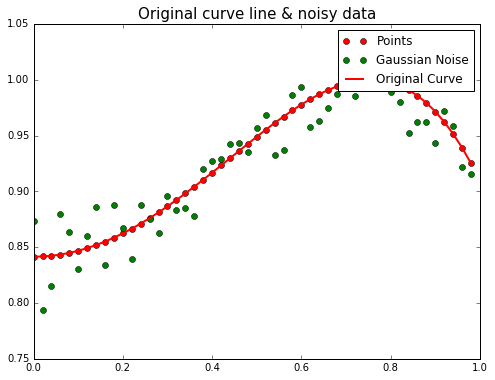

In [4]:
# Plotting the data
def plot_data(x, y, noisy):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    plt.legend()
    plt.show()
plot_data(x, y, gauss_y)

## 4. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data.

In [5]:
def calculate_phi(x, typ, M=5):
    phi = np.zeros([1, M])
    s = 0.25    # standard deviation
    u = 0          # mean
   
    if (typ=="gaussian"):
        for m in range(0, M):
            phi[0][m] = np.exp(-np.power(x - u, 2)/(2*s*s))
            u += s
    return phi

def calculate_y (x, w, M, s=0.25, u=0): 
    N = len(x)
    y = 0
    
    # for each coefficient        
    for m in range(0, M):
        y += w[m] * np.exp(-(np.square(x-u))/(2*s*s))
        u += s
        
    return y

"""
Calculate new_point (m*) as well as new_error (s*). 
m* gives you the estimated value of the new point
s* gives you the uncertainty relating to the point
"""
def calculate_new_data(mean, basis, x_new, beta, cov, M):
    phi = basis(x_new, "gaussian", M)
    new_point = np.dot(mean.transpose(), phi.transpose())
    new_error = (1/beta) + phi.dot(cov).dot(phi.transpose())
    return (new_point, new_error)

"""
After calculating the new data, update 'new_mean' and 'new_cov'
"""

def update_stats(old_mean, old_cov, phi, beta, gauss_y):
    new_cov_inv = pinv(old_cov) + beta * phi.transpose().dot(phi)
    new_cov = pinv(new_cov_inv)
    old_cov_inv = pinv(old_cov)
    #print(phi.transpose().shape)
    new_mean = new_cov.dot(old_cov_inv.dot(old_mean) + beta * phi.transpose().dot(gauss_y))
    return (new_cov, new_mean)

"""
Now, the actual loop, which goes through each new point and appends it to the list of points
"""
def plot_sequential_data(x, y, gauss_y, y_est, y_err):
#     plt.figure()
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, gauss_y, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y,label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    #print("x dim= %s, y dim= %s" % (x.shape, len(y_est)))
    est_line = plt.scatter(x, y_est, label = "Estimated Curve")
    plt.errorbar(x, y_est, y_err, ecolor="blue")
    #plt.setp(est_line, color='b', linewidth=2.0)

def calculate_initial_cov(phi, M=5, alpha=0.001, beta=0.02):
    alpha_I = np.identity(M) * alpha
    beta_phi_t_phi = np.dot(beta,(phi.transpose().dot(phi)))
    s_init_inv = np.add(alpha_I, beta_phi_t_phi)
    s_init = pinv(s_init_inv)
    
    return s_init    

#psd -> plot sequential data
def plot_graphs(psd, basis, M, x, y, gauss_y, alpha, beta):
    if (beta < 1):
        factor = 1e3
    elif (beta < 4):
        factor = 1e1
    else:
        factor = 1
    
    """
    Calculate the initial conditions for:
            1. phi
            2. M_N
            3. S_N
    """
    randomized_x = random.sample(list(enumerate(x)), len(x))
    phi = basis(randomized_x[0][1], "gaussian", M)
    
    # calculate the initial mean and covariance
    initial_cov = calculate_initial_cov(phi, M=M, alpha=alpha)
    initial_mean = np.multiply(beta, initial_cov.dot(phi.transpose().dot(gauss_y[0])))
    
    for j in range(len(x)):
        plt.figure()
        plt.show()
        """ Now get the new_data for each x point"""
        y_est = []
        y_err = []
        
        for i in range(len(x)):
            new_data = calculate_new_data(initial_mean, basis, x[i], beta, initial_cov, M)
            y_est.append(new_data[0].flatten())
            y_err.append((new_data[1].flatten() / factor))
        print(randomized_x[j][1])
        psd(x, y, gauss_y, y_est, y_err)
        
        """ Get new statistics """
        if (j+1<len(x)):
            phi = basis(randomized_x[j+1][1], "gaussian", M)
            new_stats = update_stats(initial_mean, initial_cov, phi, beta, gauss_y[randomized_x[j+1][0]])
            # update the new covariance and mean
            initial_cov = new_stats[0]
            initial_mean = new_stats[1]

#plot_graphs(plot_sequential_data, basis_function, 5, x, y, gauss_y, 1.6)


## Too Low Beta -> Fitting is not good

0.62


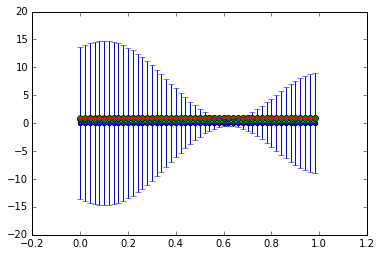

0.92


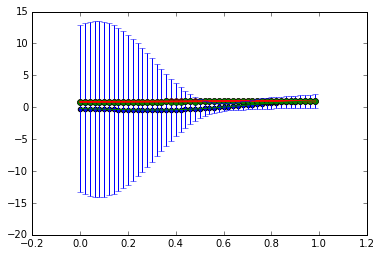

0.54


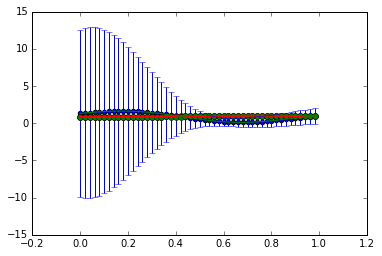

0.88


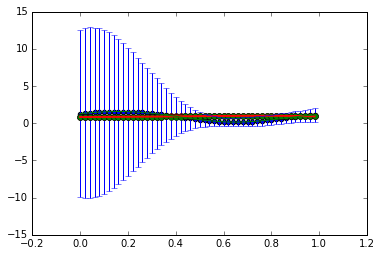

0.4


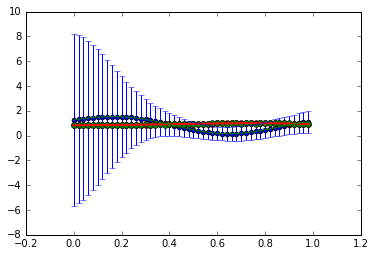

0.18


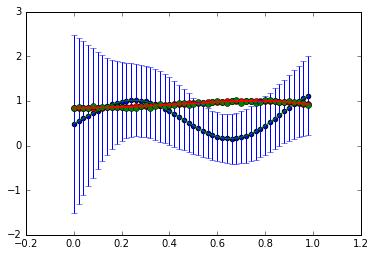

0.32


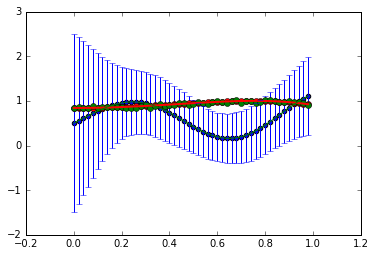

0.36


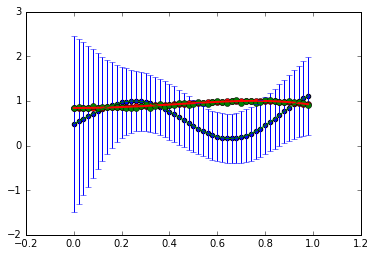

0.42


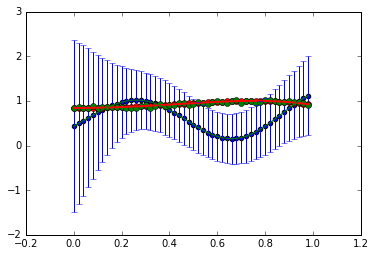

0.82


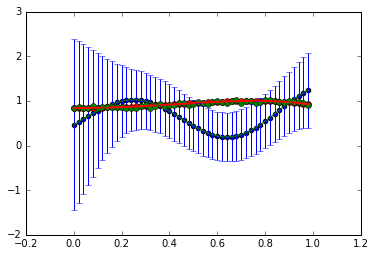

0.72


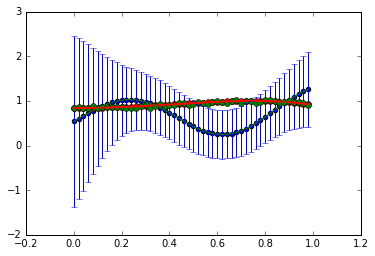

0.26


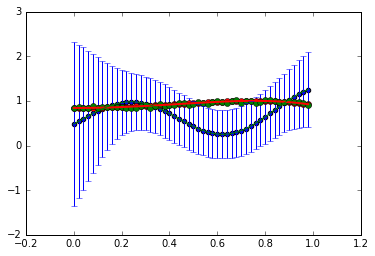

0.84


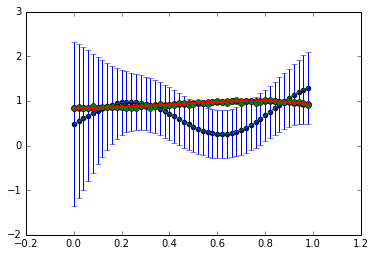

0.0


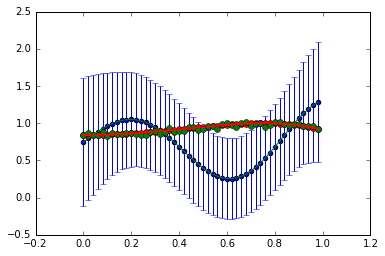

0.44


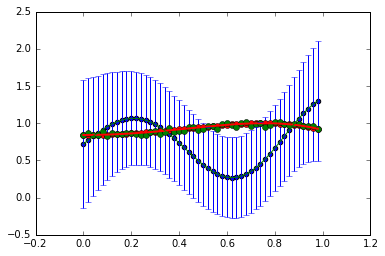

0.5


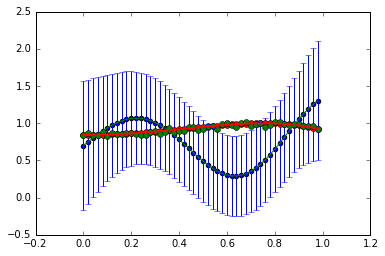

0.1


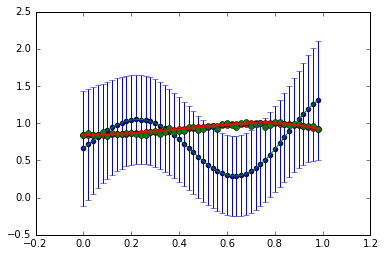

0.8


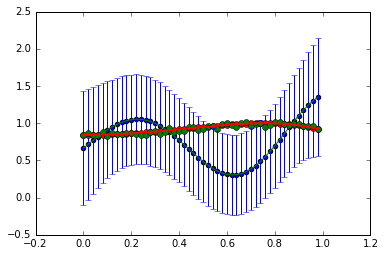

0.14


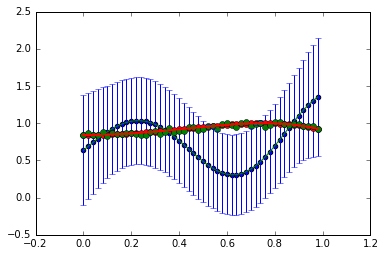

0.04


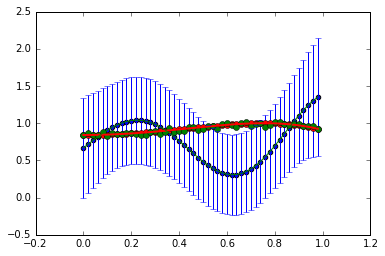

0.02


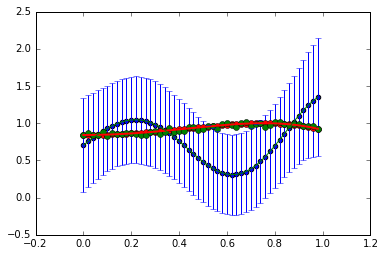

0.9


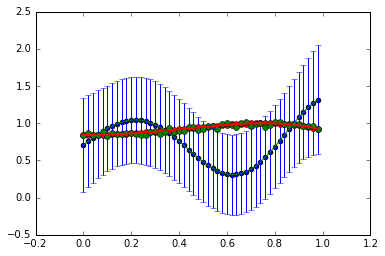

0.2


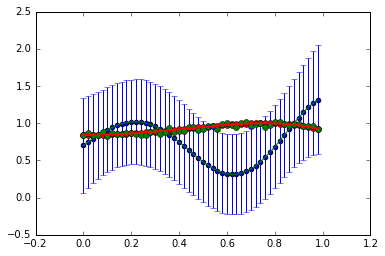

0.06


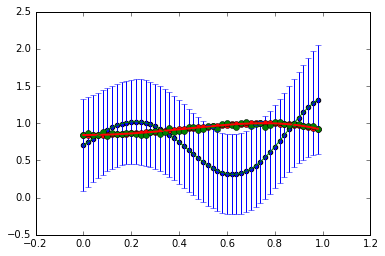

0.38


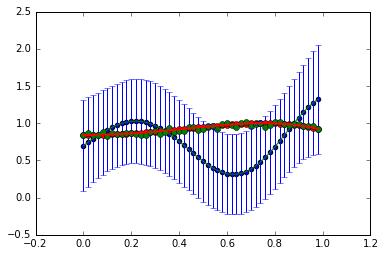

0.56


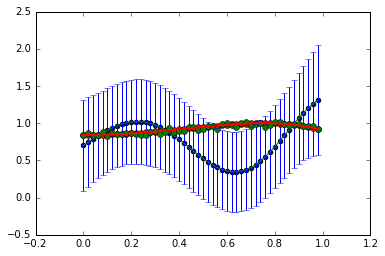

0.28


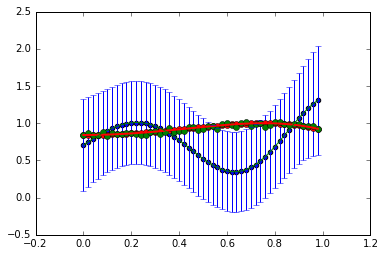

0.16


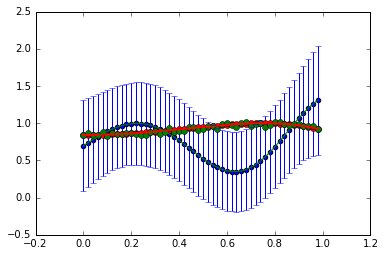

0.78


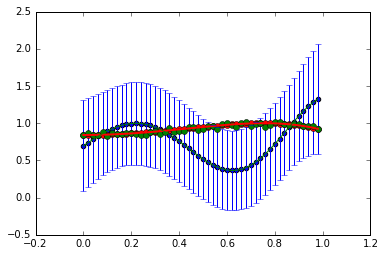

0.96


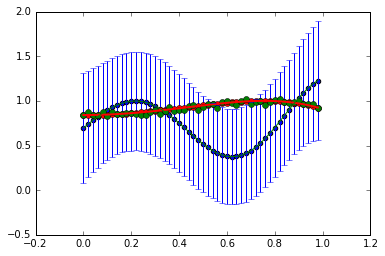

0.68


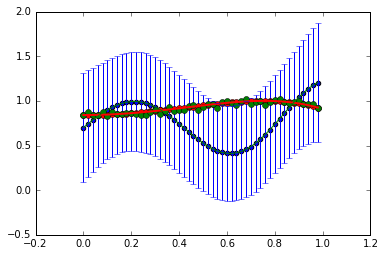

0.24


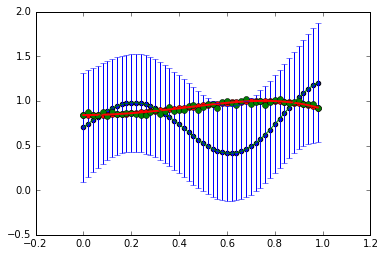

0.76


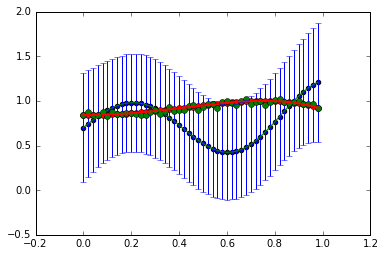

0.52


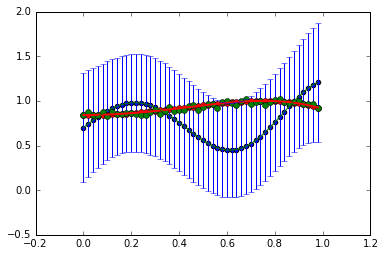

0.12


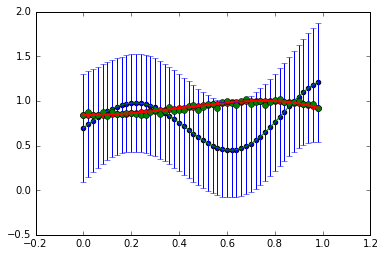

0.86


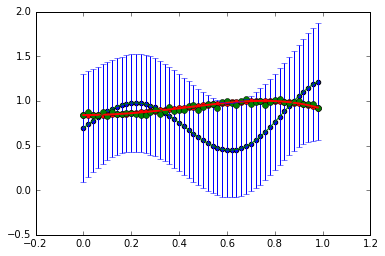

0.22


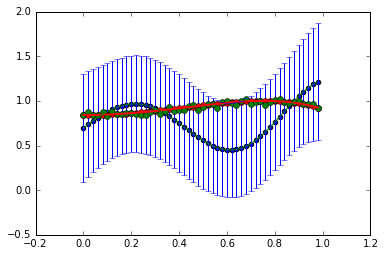

0.6


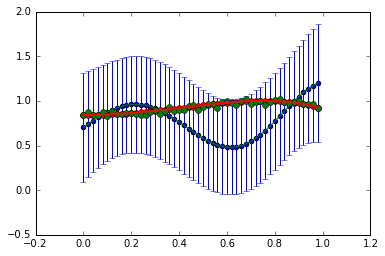

0.3


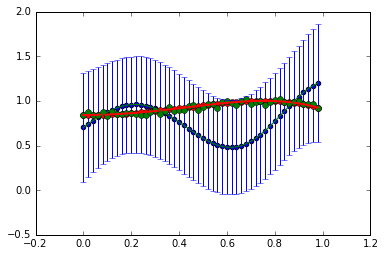

0.74


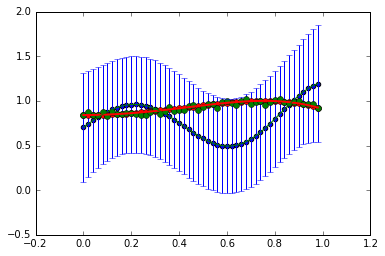

0.66


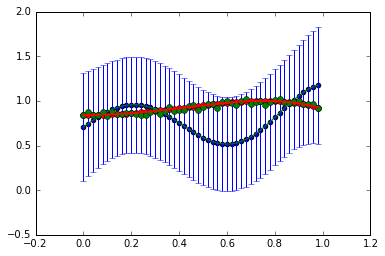

0.46


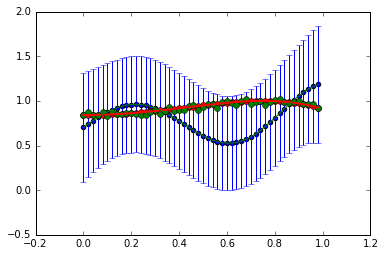

0.48


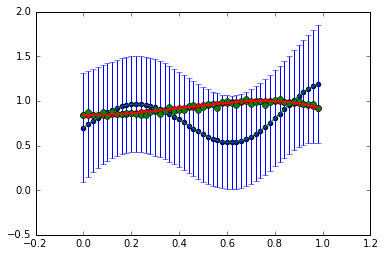

0.7


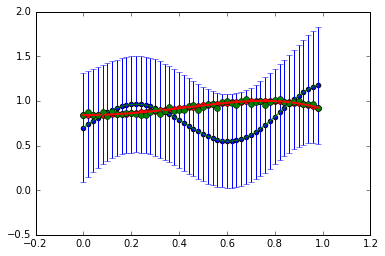

0.58


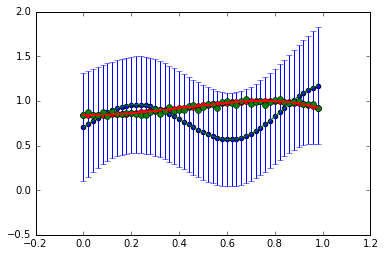

0.64


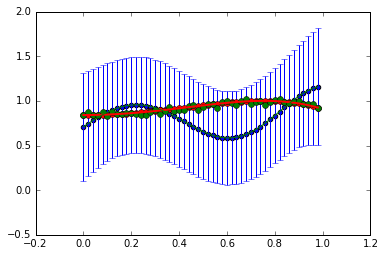

0.94


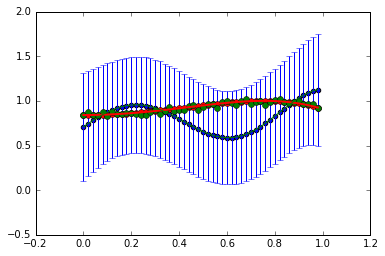

0.34


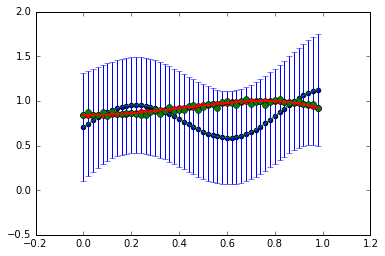

0.98


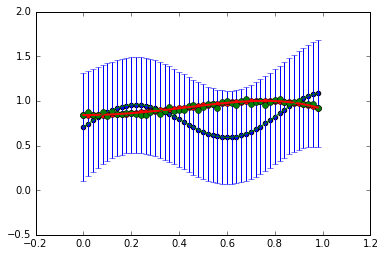

0.08


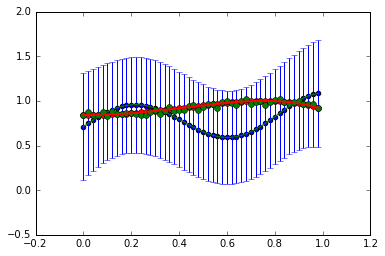

In [45]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-4,0.002)

## Low Beta -> Fitting is very good

0.9


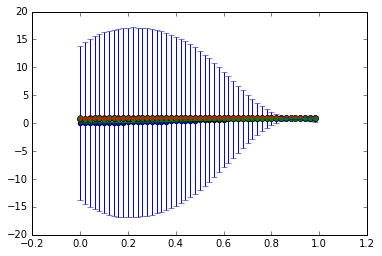

0.7


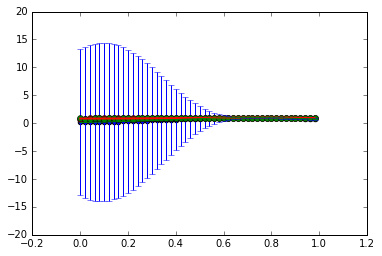

0.16


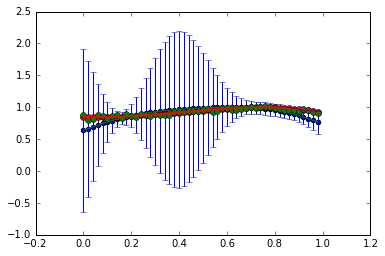

0.12


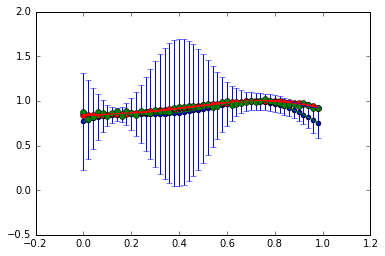

0.72


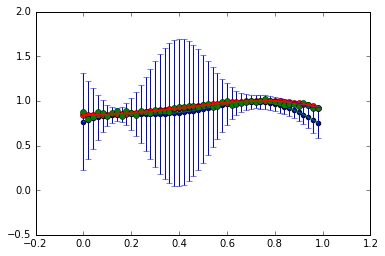

0.86


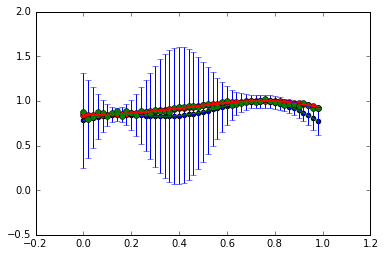

0.06


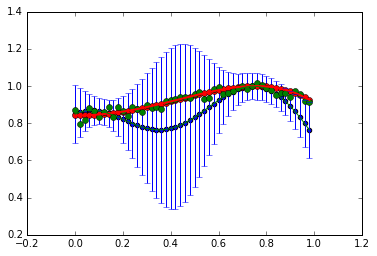

0.0


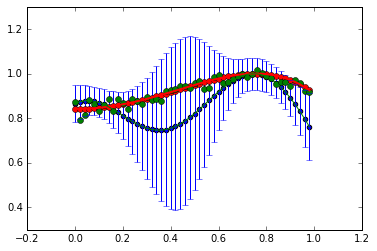

0.36


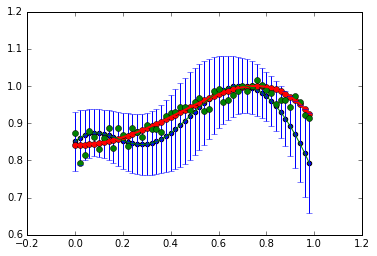

0.14


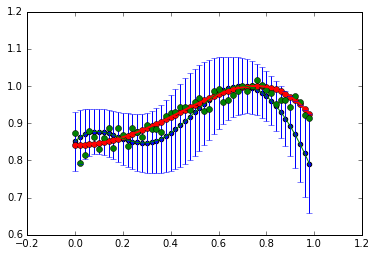

0.08


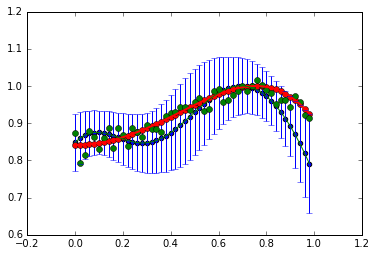

0.22


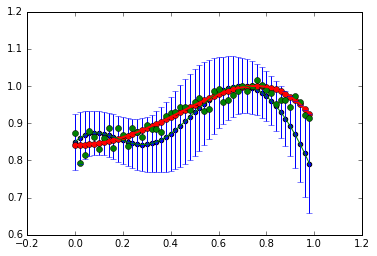

0.98


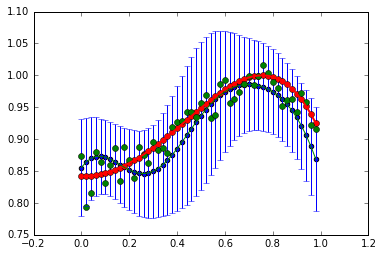

0.32


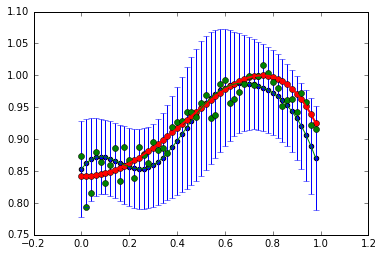

0.02


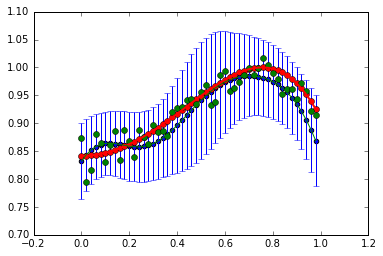

0.6


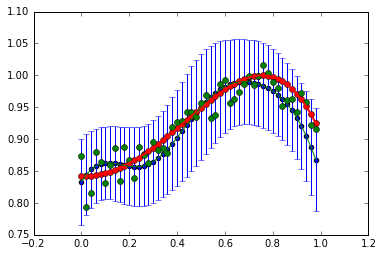

0.5


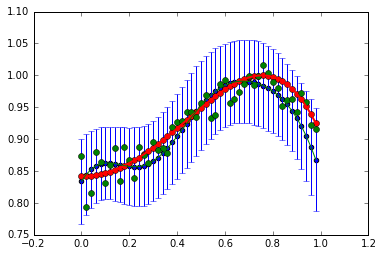

0.74


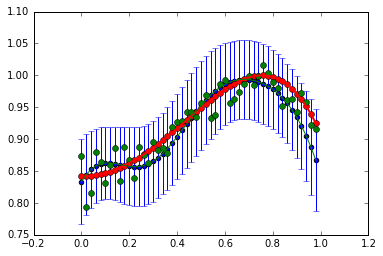

0.46


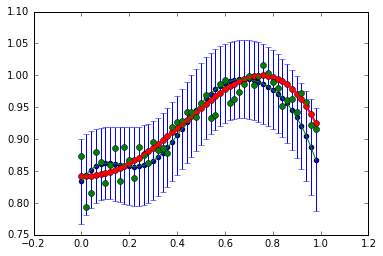

0.68


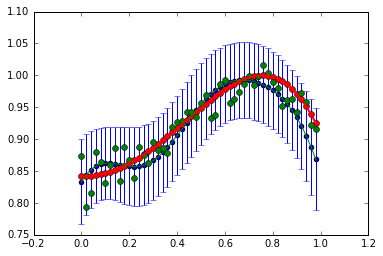

0.92


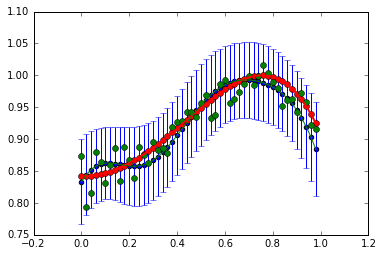

0.84


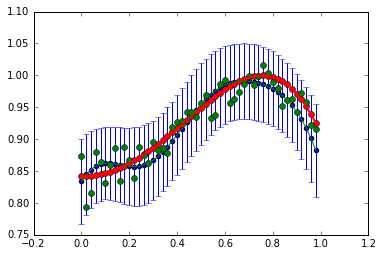

0.18


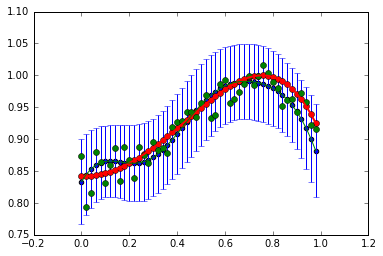

0.48


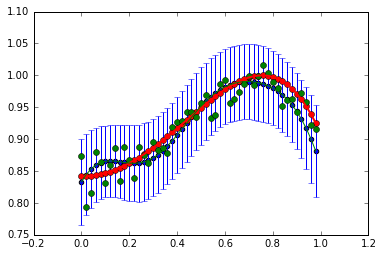

0.4


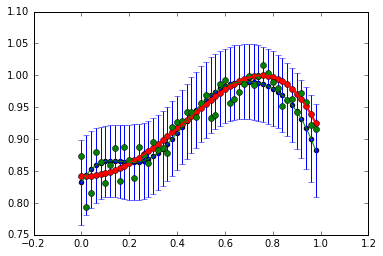

0.64


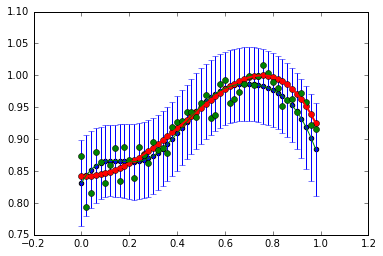

0.42


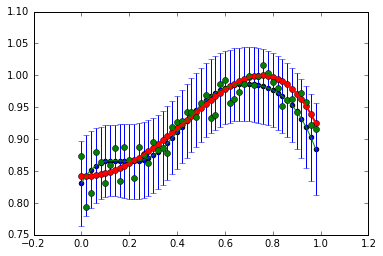

0.04


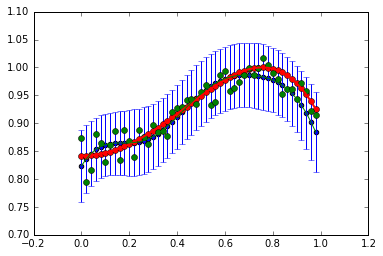

0.34


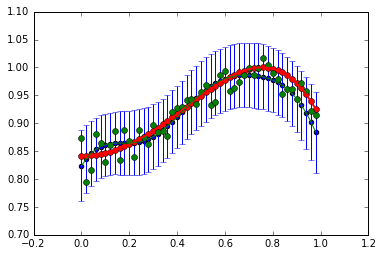

0.88


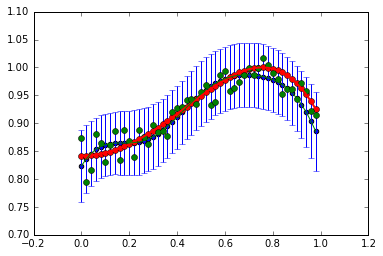

0.26


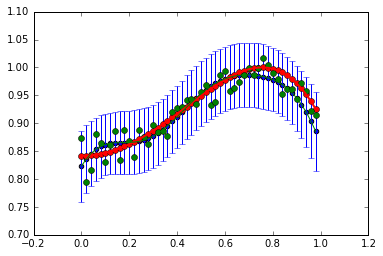

0.8


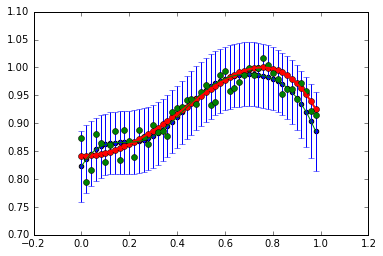

0.1


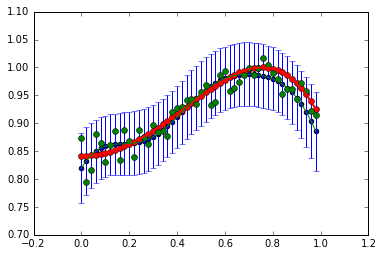

0.24


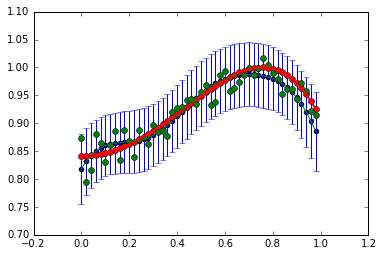

0.2


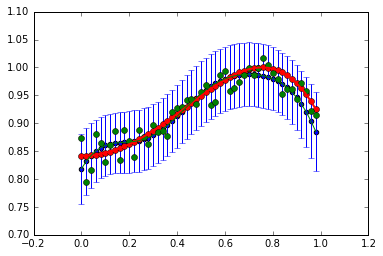

0.52


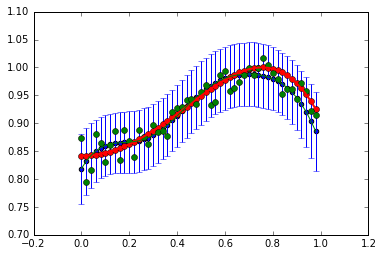

0.28


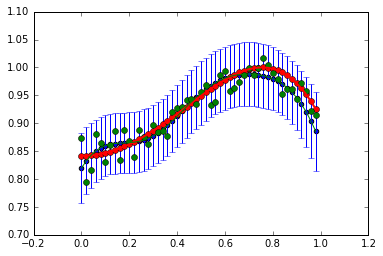

0.38


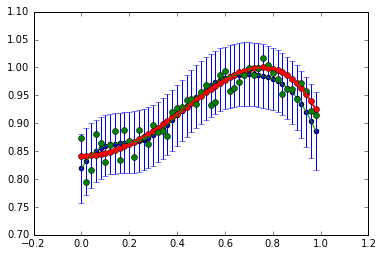

0.56


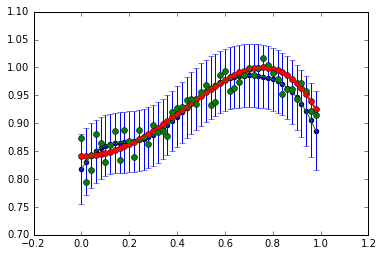

0.58


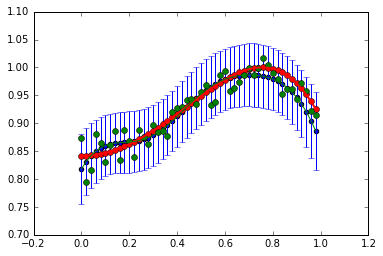

0.96


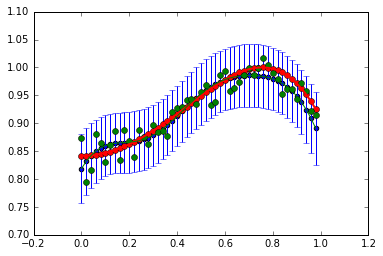

0.76


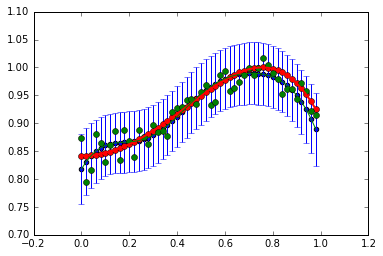

0.54


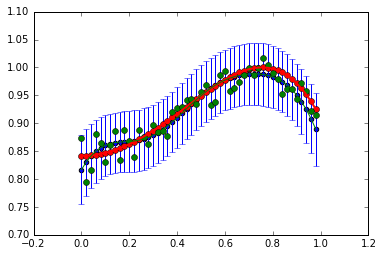

0.62


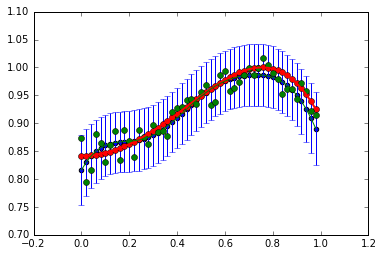

0.94


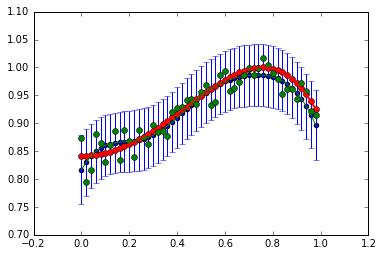

0.78


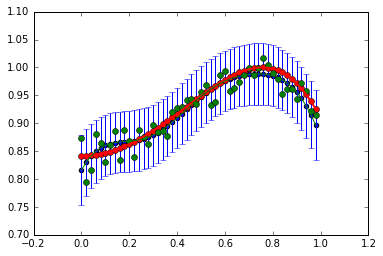

0.44


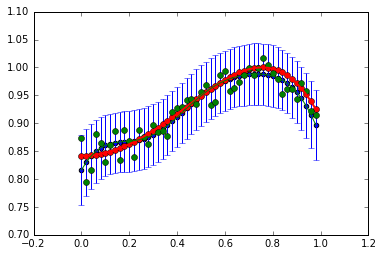

0.66


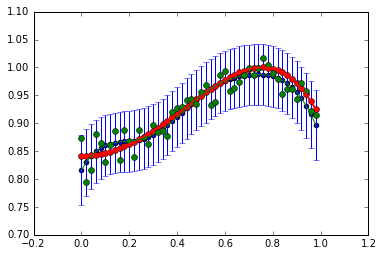

In [ ]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-4,0.02)

## Medium - Low Beta -> Fitting is slightly worse with relatively similar errors throughout

0.82


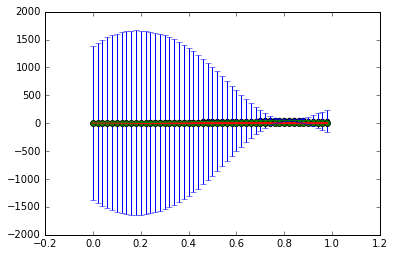

0.4


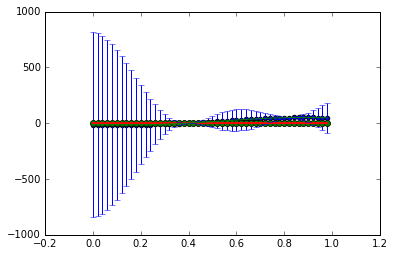

0.68


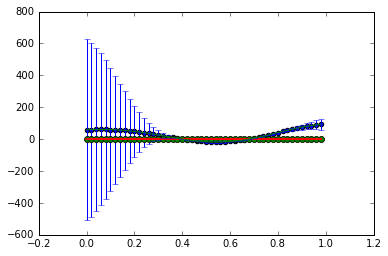

0.3


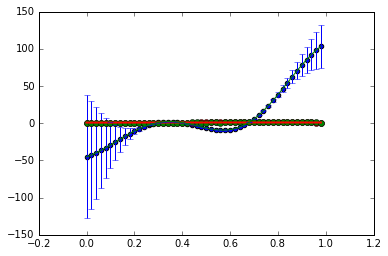

0.46


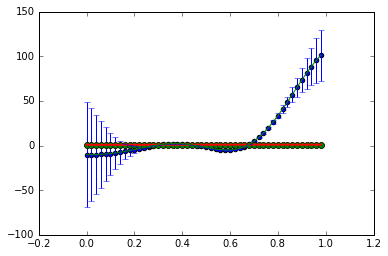

0.96


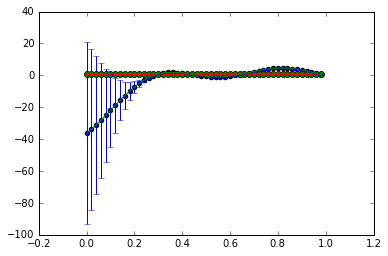

0.84


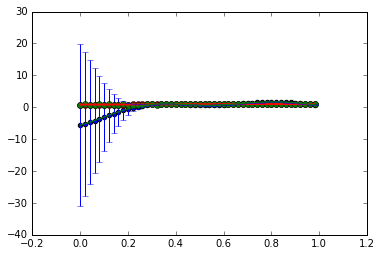

0.22


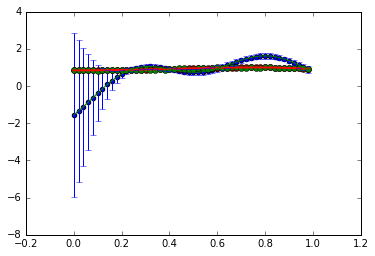

0.0


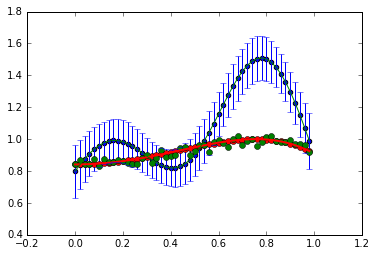

0.12


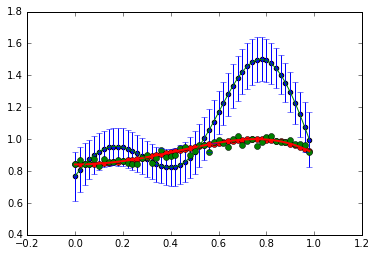

0.6


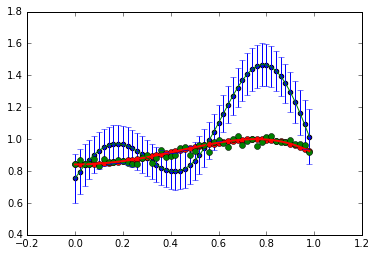

0.48


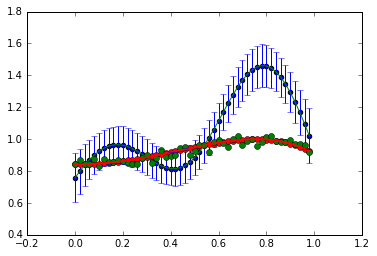

0.54


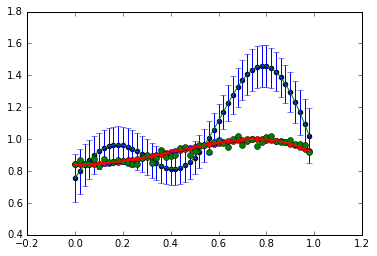

0.94


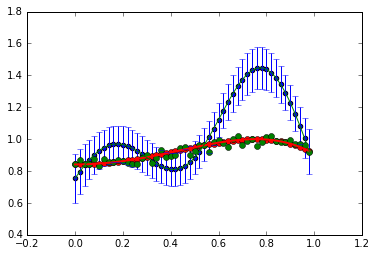

0.9


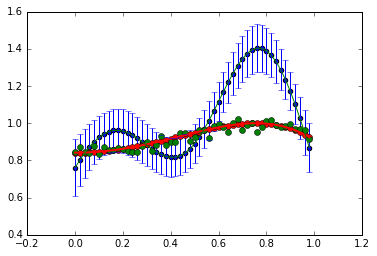

0.58


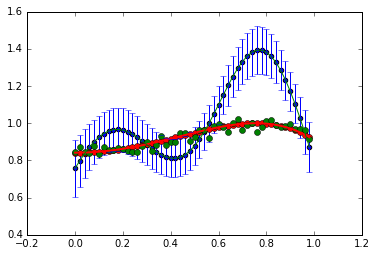

0.26


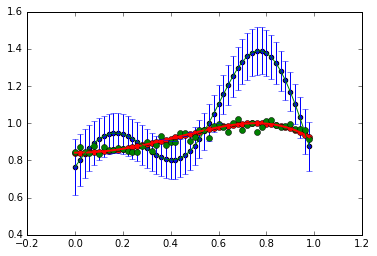

0.72


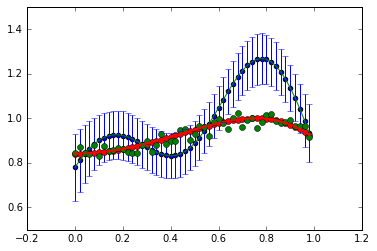

0.32


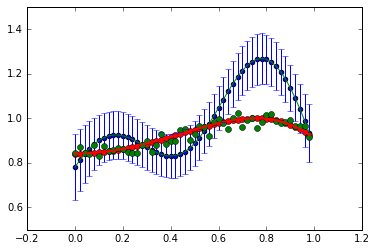

0.88


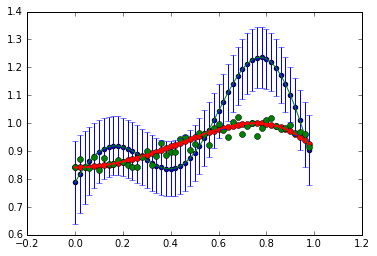

0.92


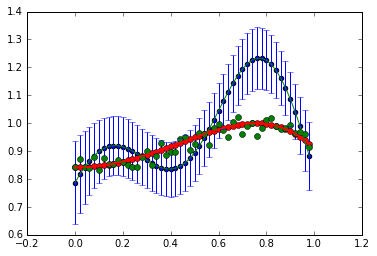

0.44


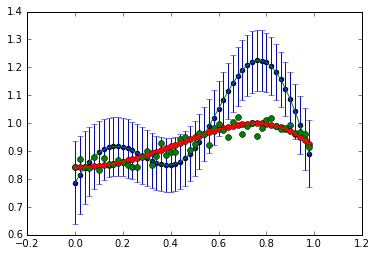

0.38


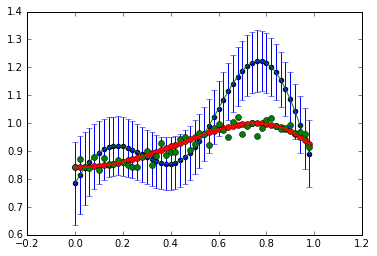

0.1


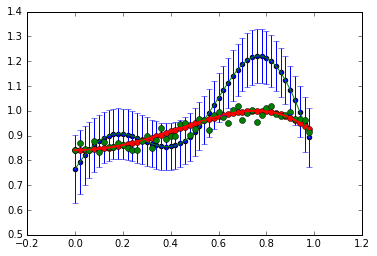

0.62


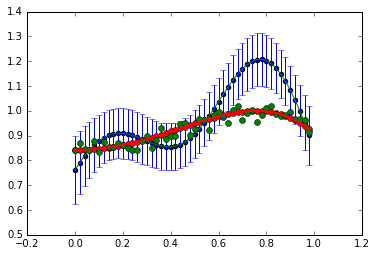

0.08


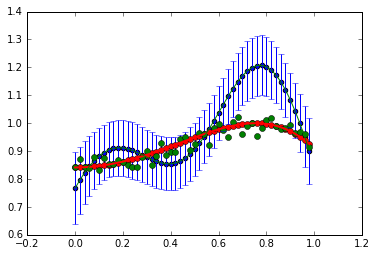

0.16


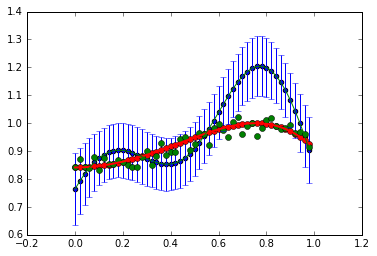

0.06


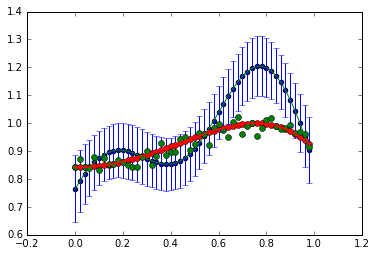

0.2


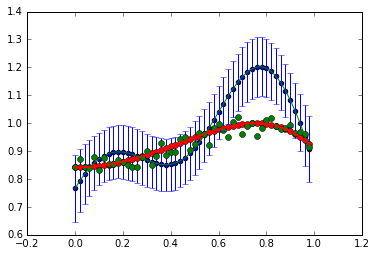

0.76


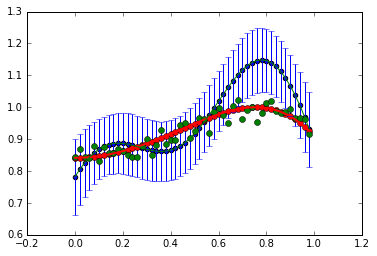

0.24


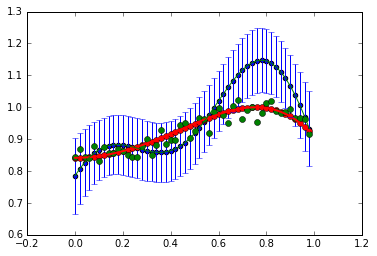

0.18


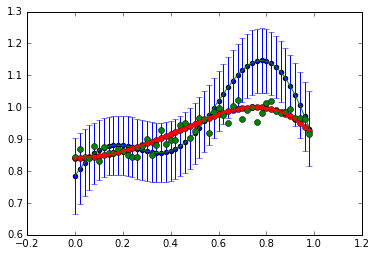

0.42


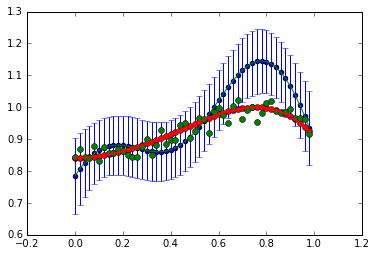

0.66


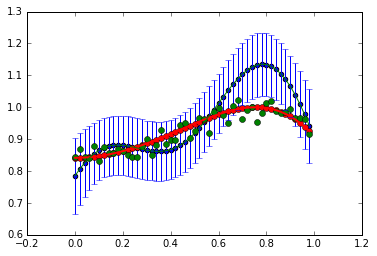

0.34


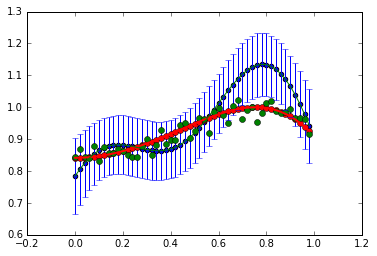

0.52


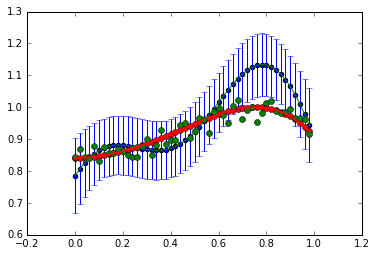

0.36


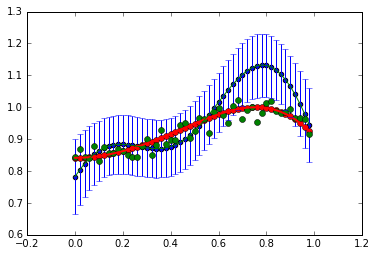

0.56


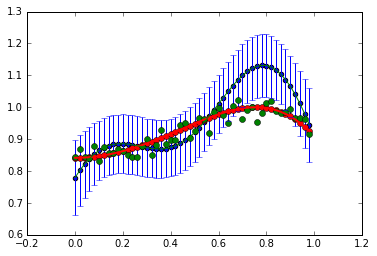

0.28


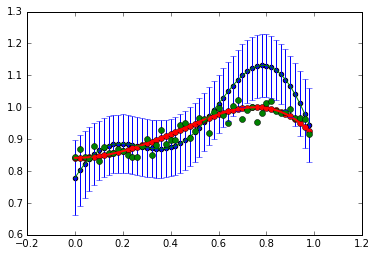

0.74


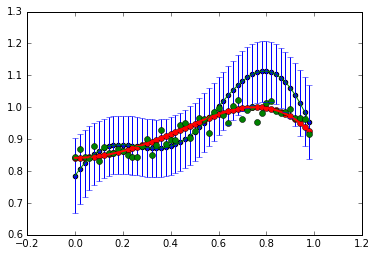

0.7


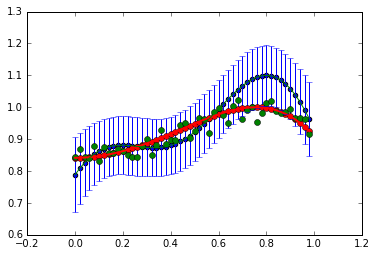

0.86


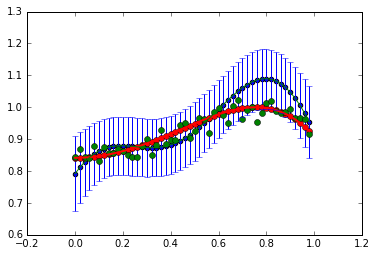

0.8


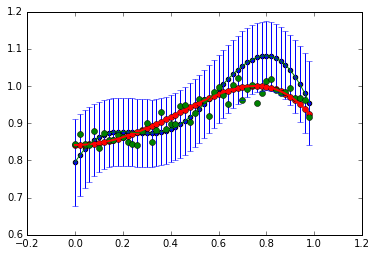

0.14


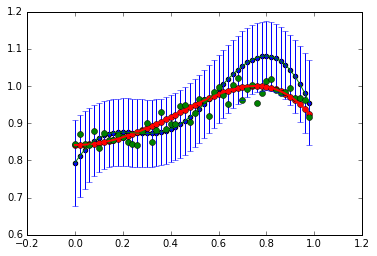

0.98


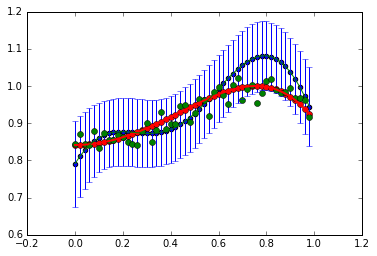

0.02


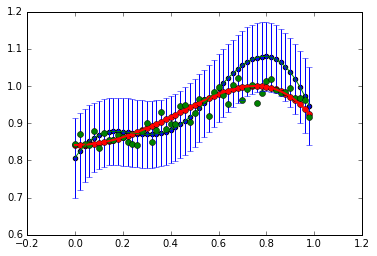

0.5


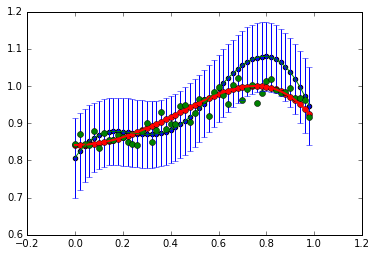

0.78


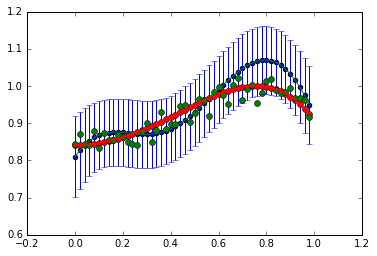

0.04


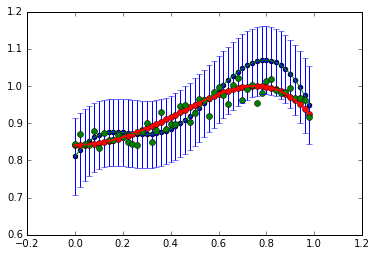

0.64


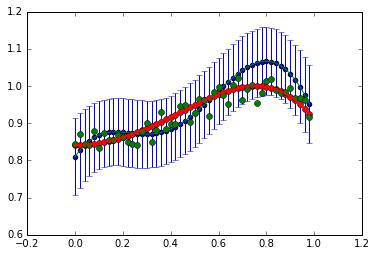

In [52]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-4, 1.2)

## Medium Beta -> Fitting is worse

0.18


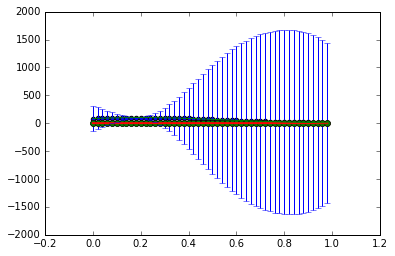

0.94


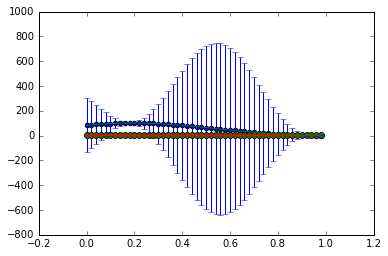

0.4


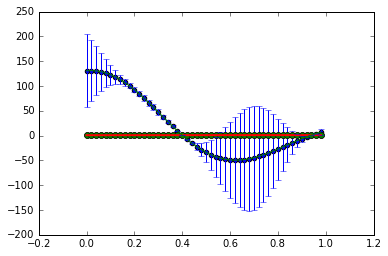

0.5


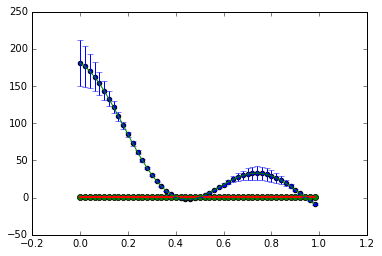

0.34


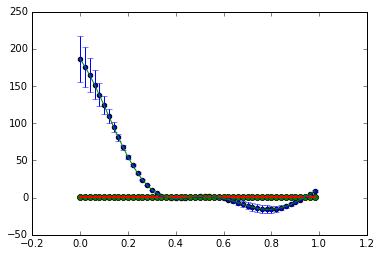

0.96


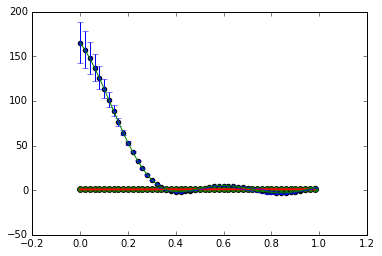

0.52


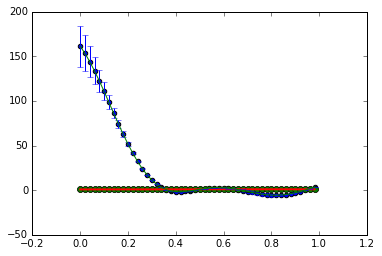

0.76


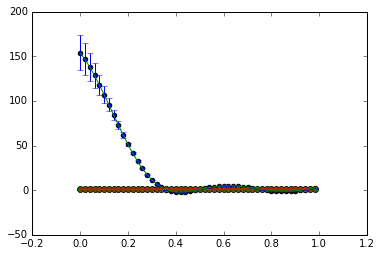

0.86


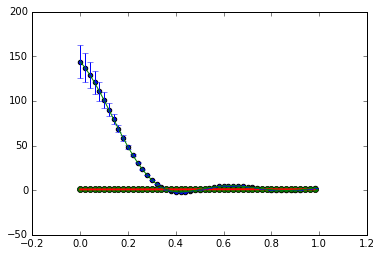

0.64


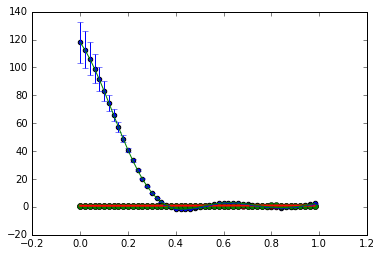

0.98


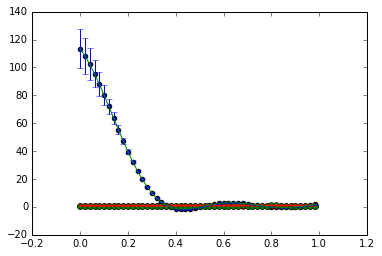

0.02


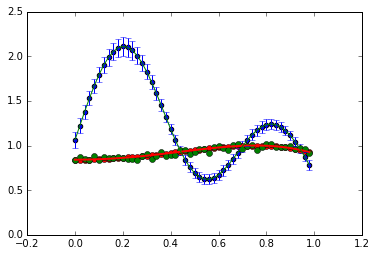

0.32


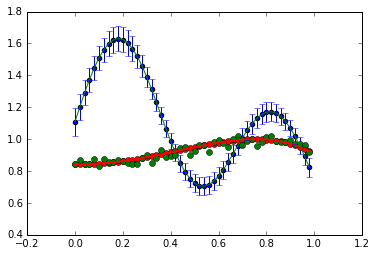

0.7


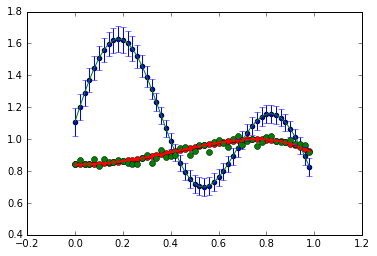

0.1


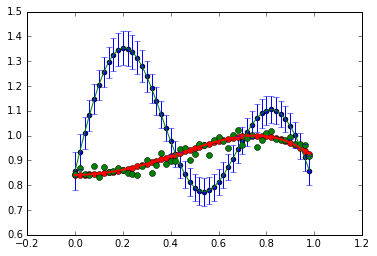

0.54


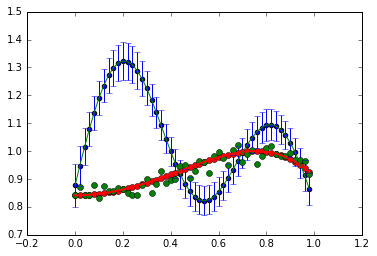

0.92


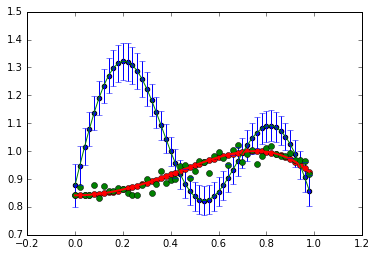

0.38


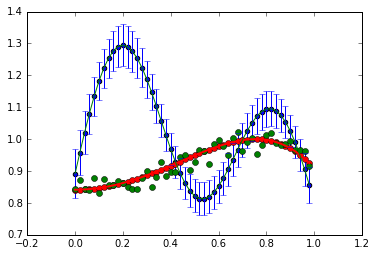

0.44


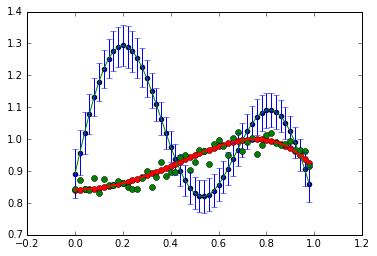

0.0


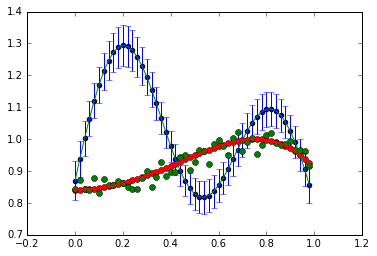

0.42


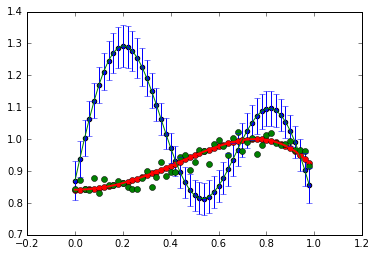

0.2


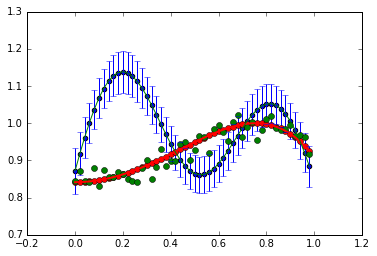

0.26


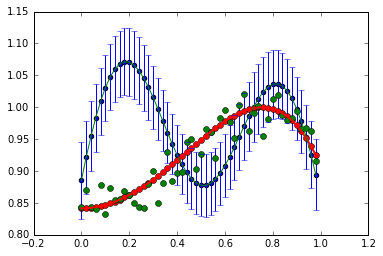

0.22


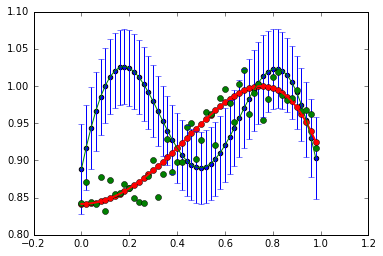

0.68


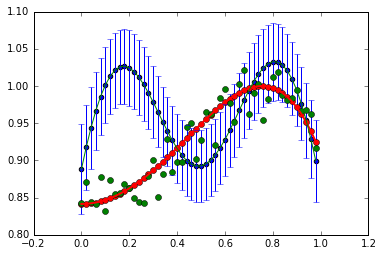

0.88


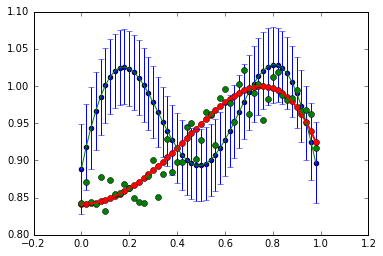

0.28


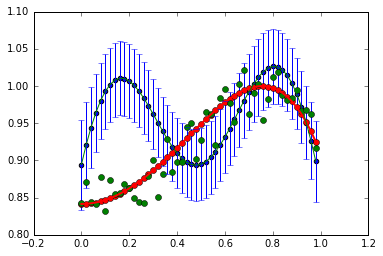

0.06


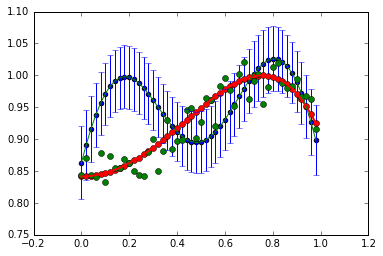

0.36


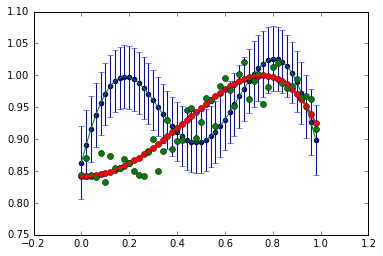

0.62


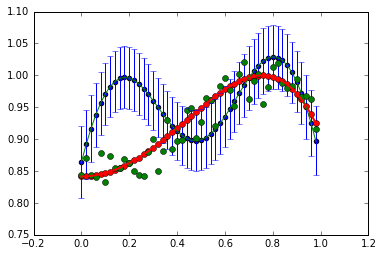

0.72


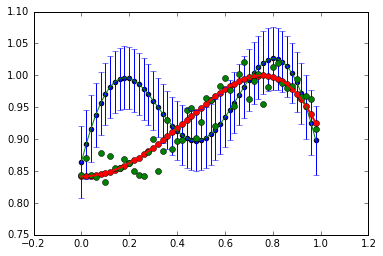

0.6


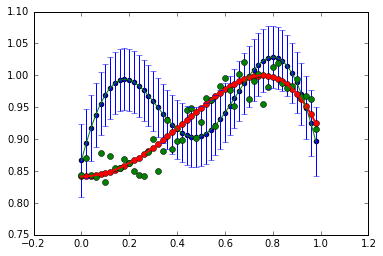

0.56


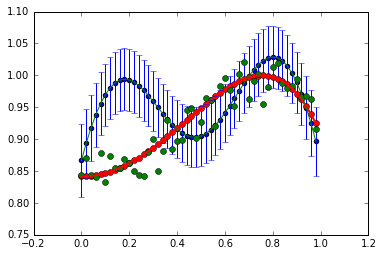

0.78


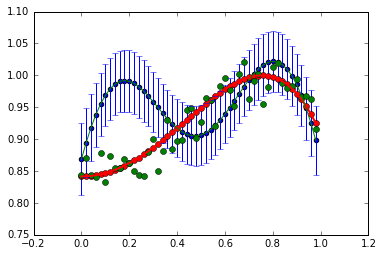

0.82


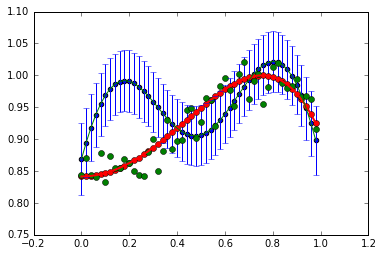

0.24


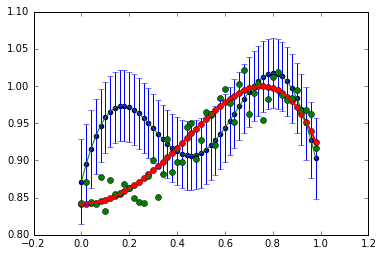

0.8


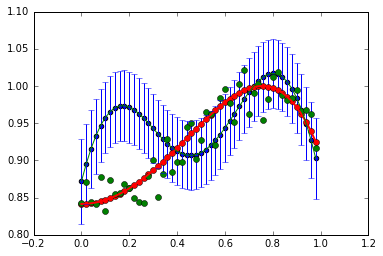

0.58


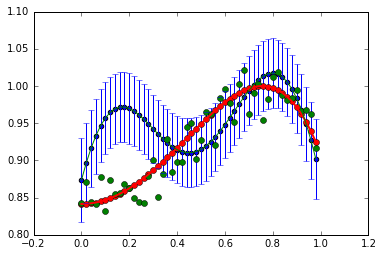

0.12


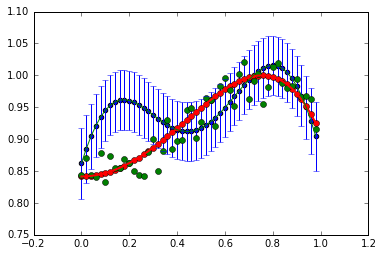

0.04


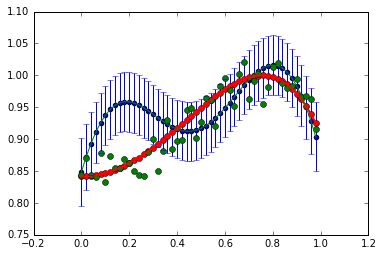

0.3


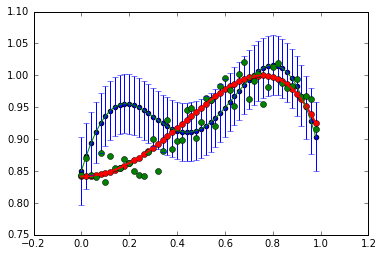

0.66


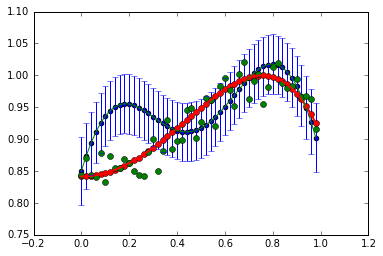

0.9


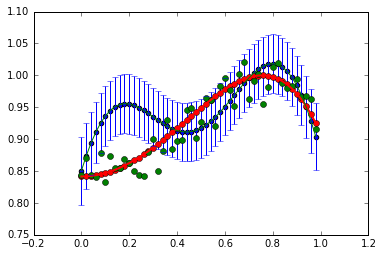

0.16


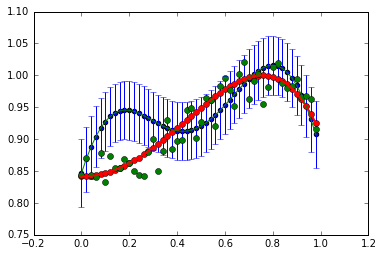

0.74


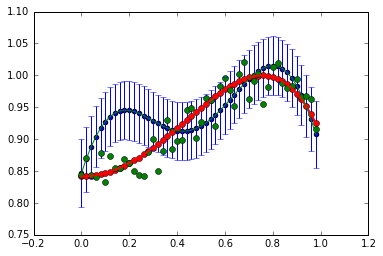

0.08


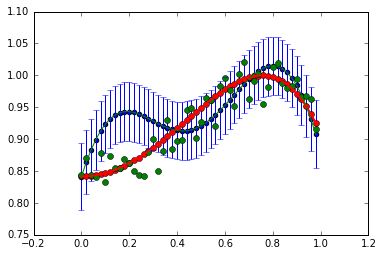

0.14


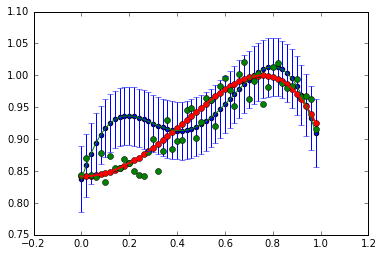

0.48


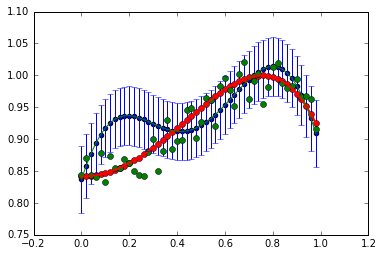

0.84


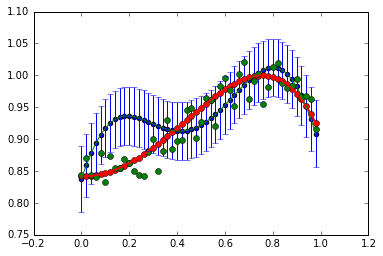

0.46


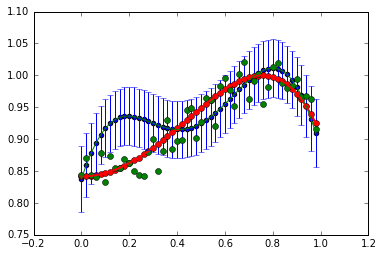

In [48]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-4,2.4)

## Medium - High beta -> Curve fits even worse. More confident, but less accurate graphs

0.34


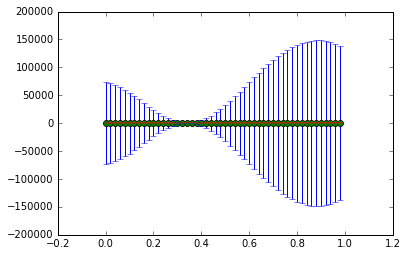

0.62


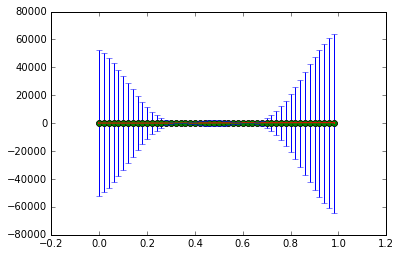

0.88


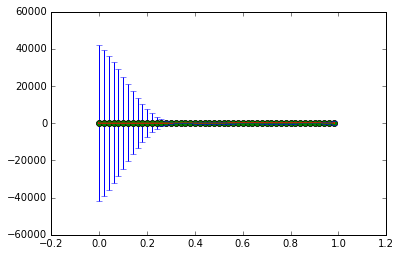

0.82


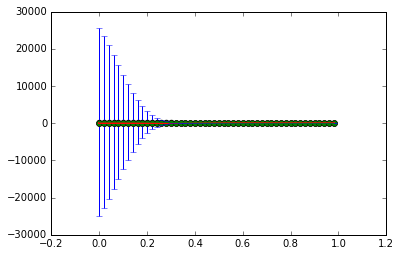

0.52


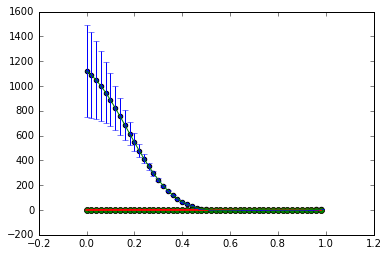

0.12


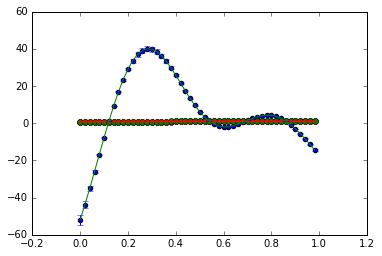

0.28


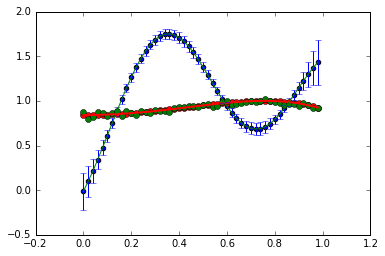

0.24


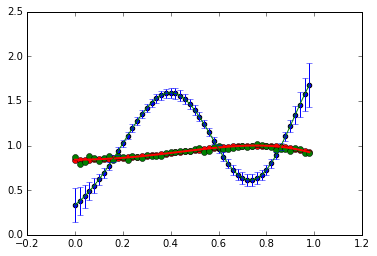

0.18


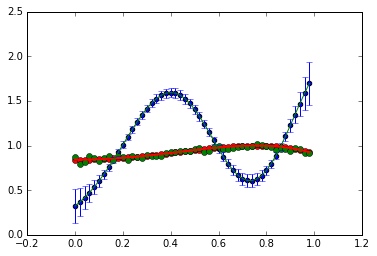

0.54


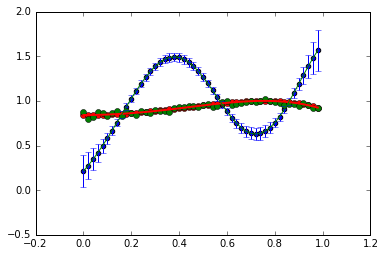

0.0


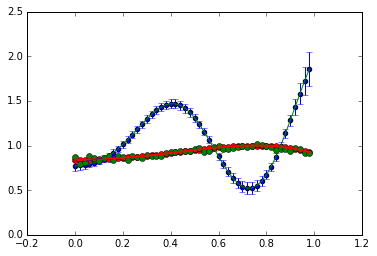

0.48


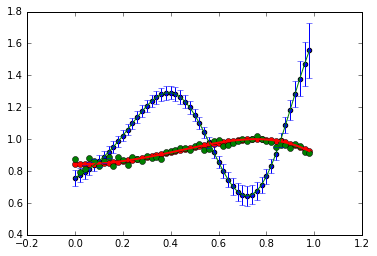

0.04


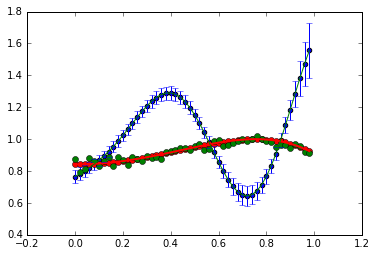

0.14


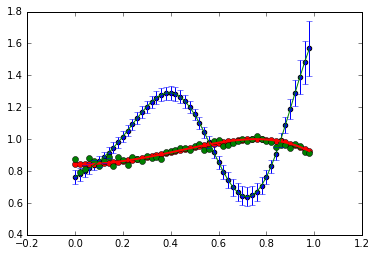

0.22


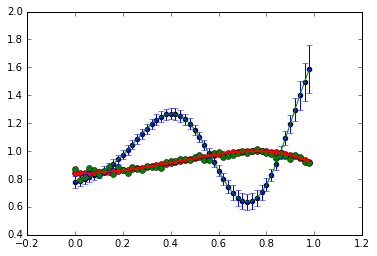

0.56


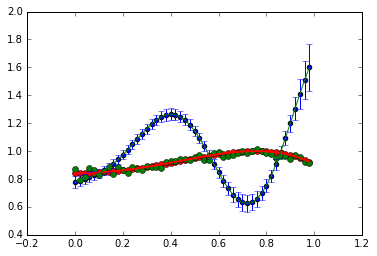

0.86


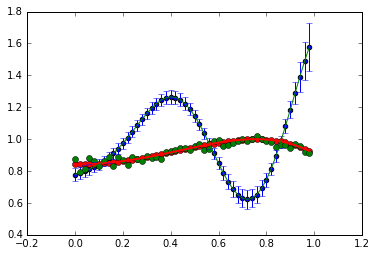

0.92


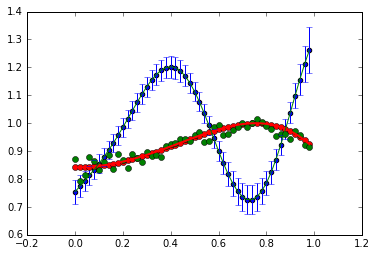

0.42


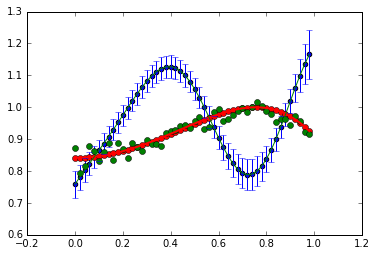

0.4


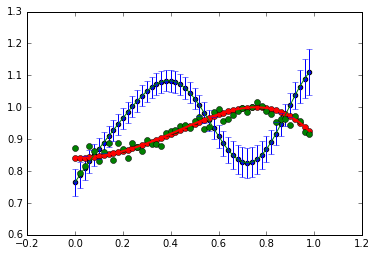

0.64


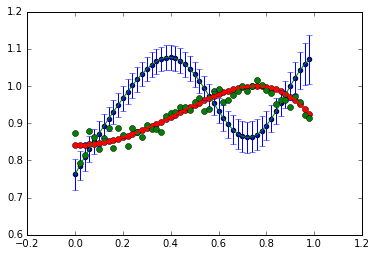

0.78


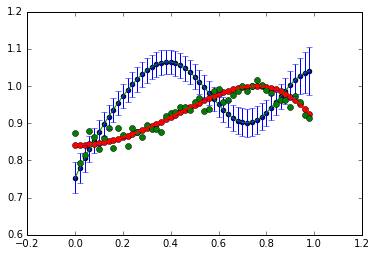

0.8


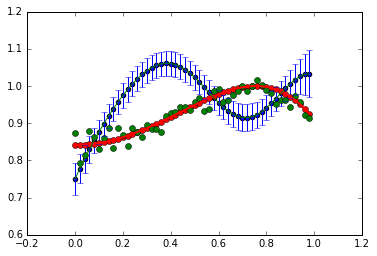

0.7


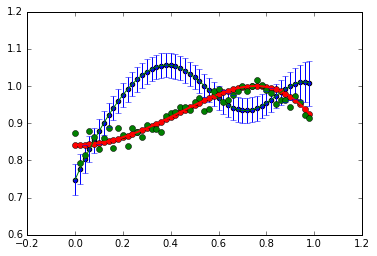

0.68


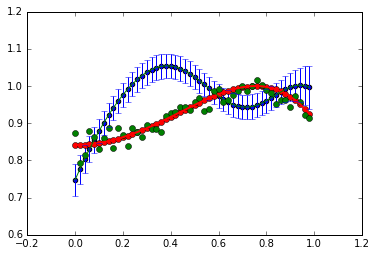

0.26


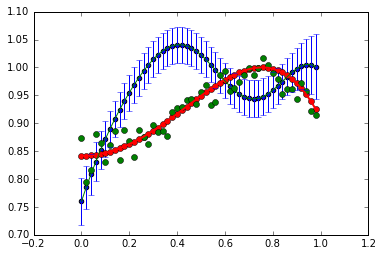

0.5


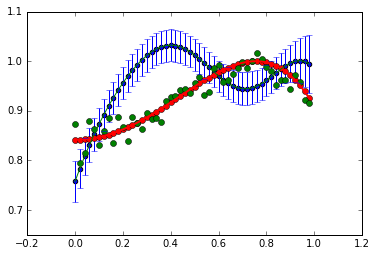

0.02


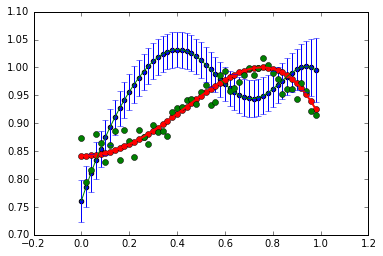

0.84


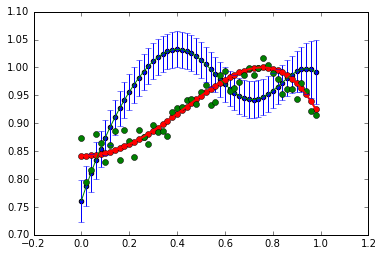

0.6


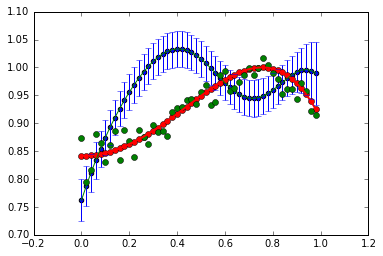

0.66


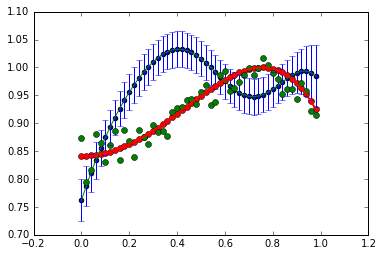

0.2


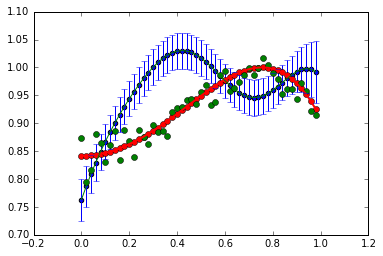

0.3


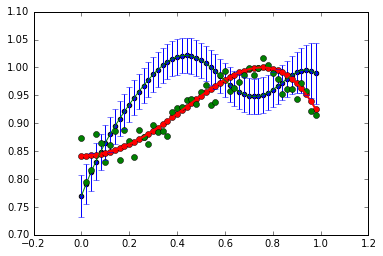

0.96


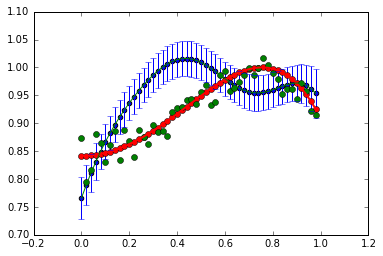

0.74


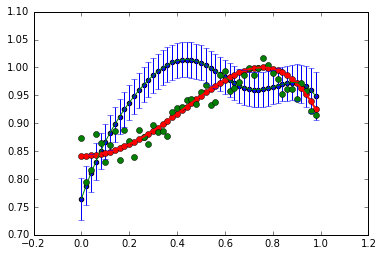

0.36


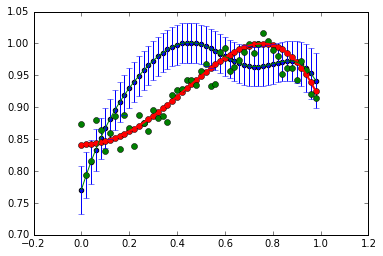

0.72


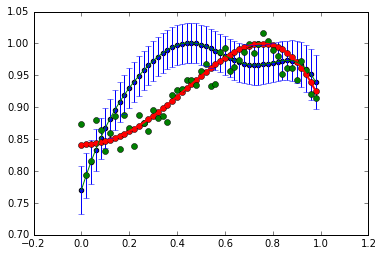

0.38


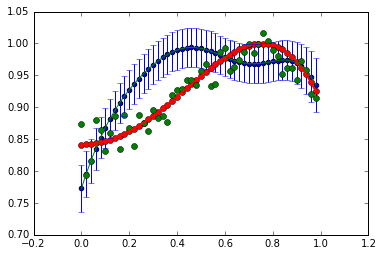

0.76


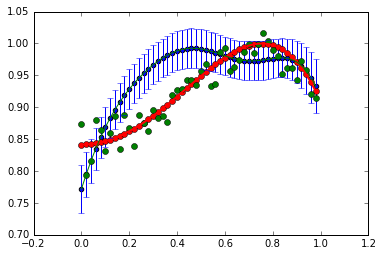

0.1


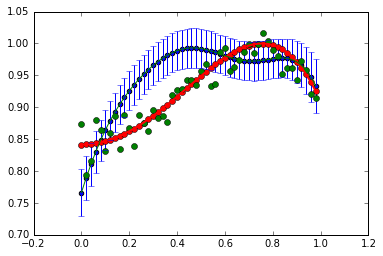

0.98


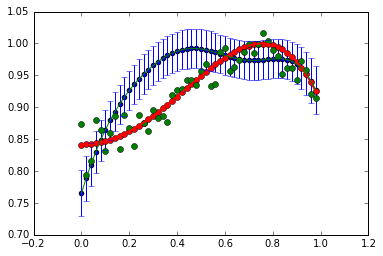

0.94


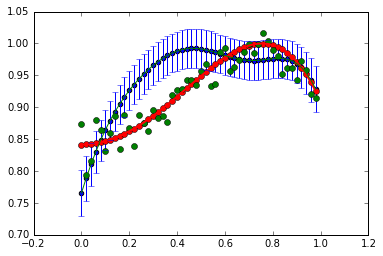

0.58


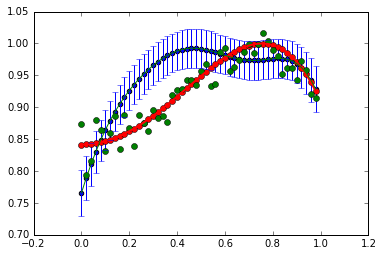

0.06


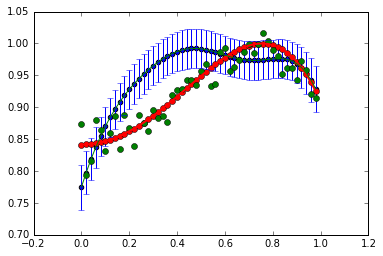

0.08


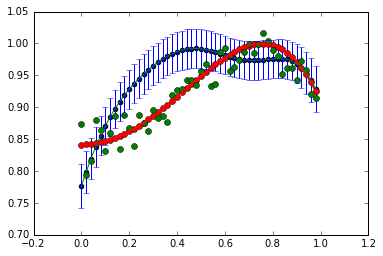

0.9


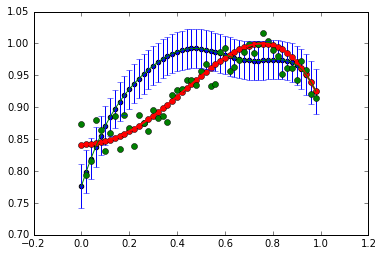

0.16


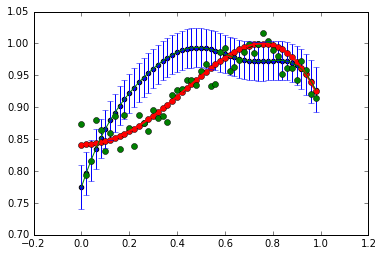

0.32


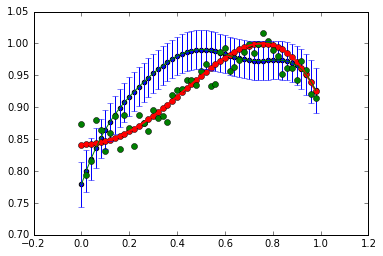

0.44


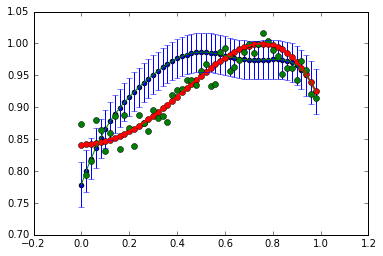

0.46


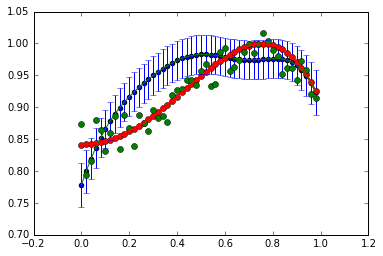

In [8]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-6,3.6)

## High beta -> Fits okay for some parts but the tail end deviates

0.72


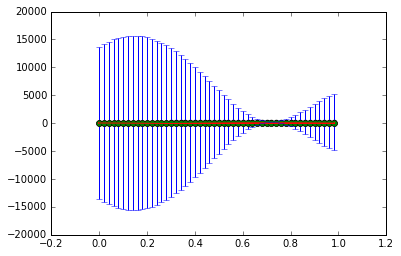

0.78


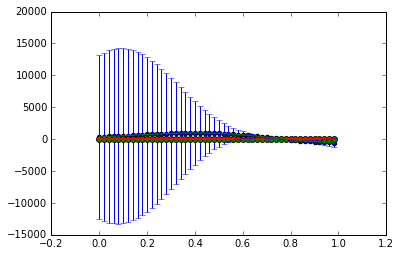

0.12


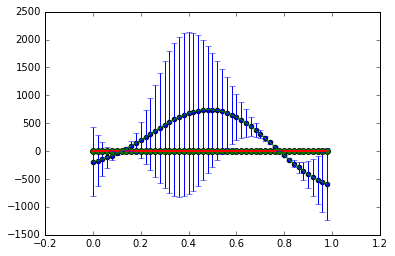

0.36


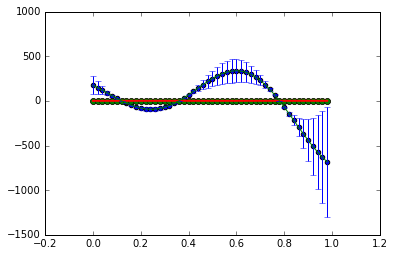

0.26


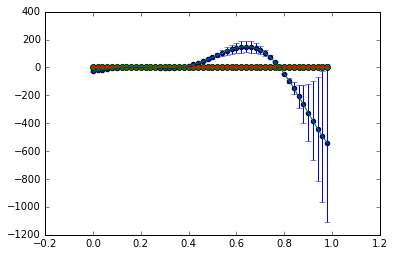

0.5


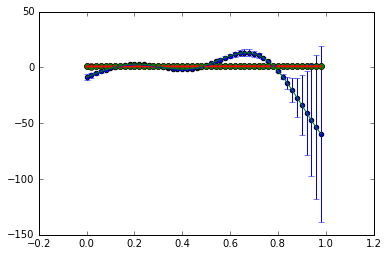

0.62


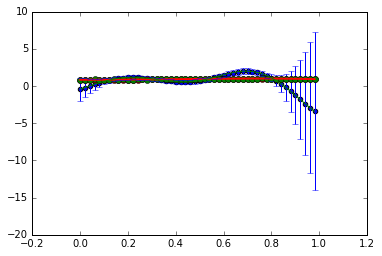

0.98


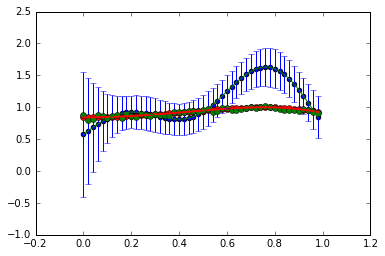

0.14


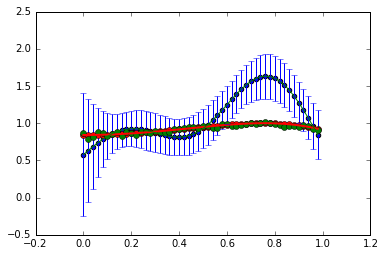

0.08


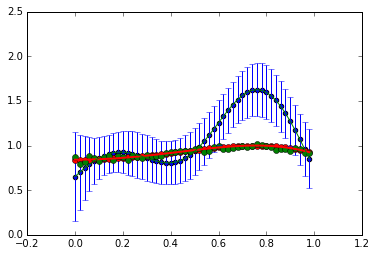

0.74


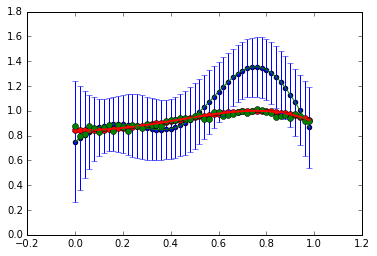

0.24


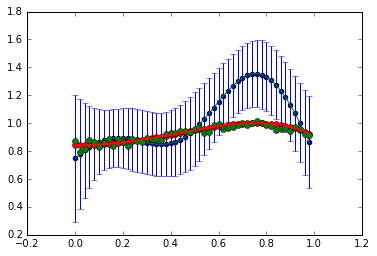

0.22


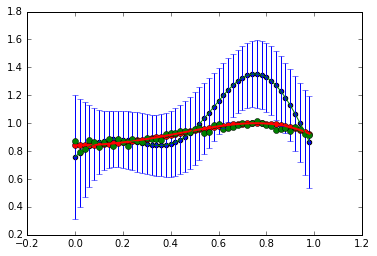

0.6


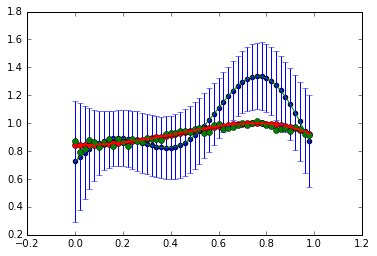

0.2


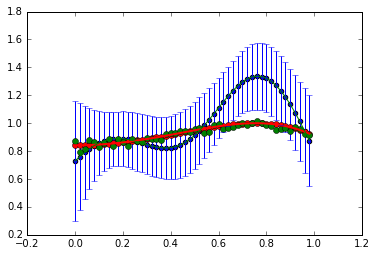

0.84


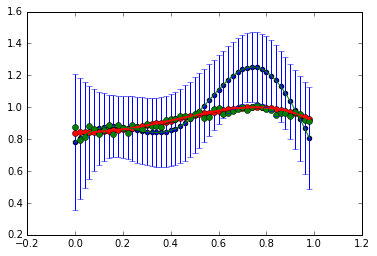

0.92


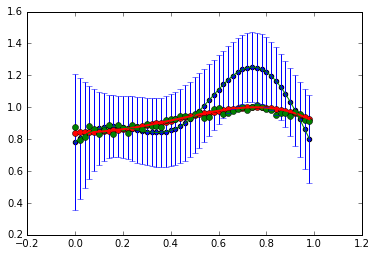

0.8


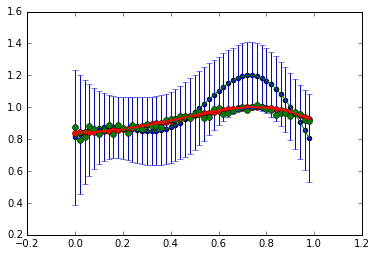

0.9


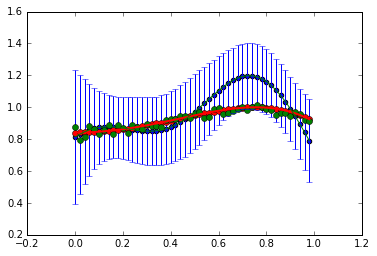

0.64


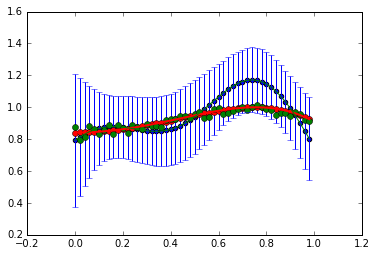

0.02


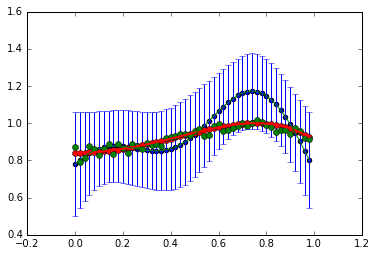

0.1


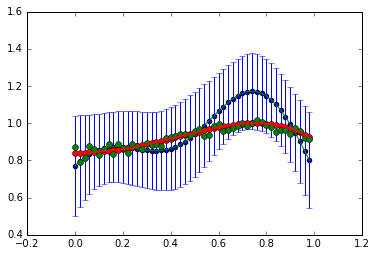

0.96


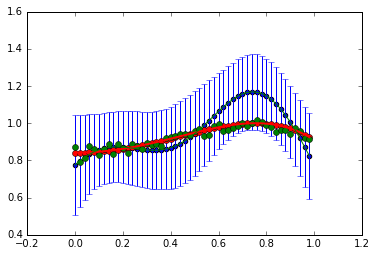

0.7


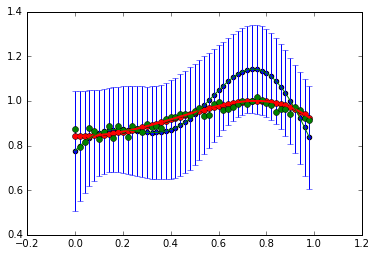

0.68


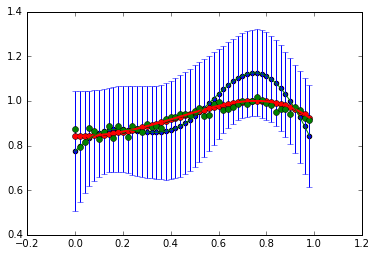

0.54


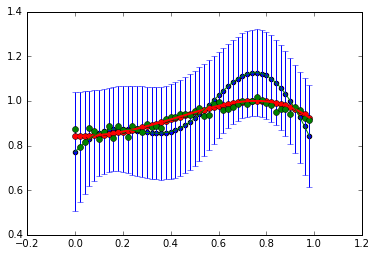

0.38


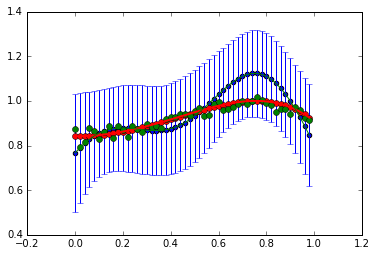

0.44


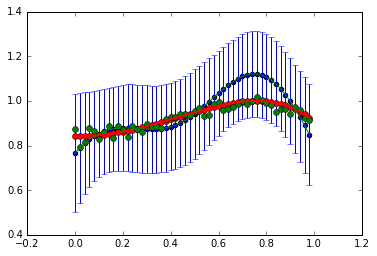

0.34


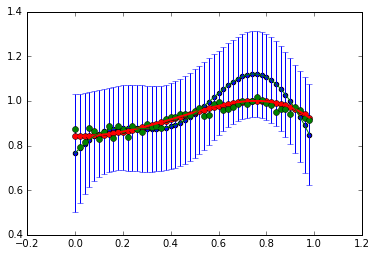

0.48


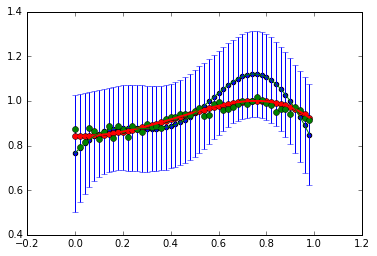

0.86


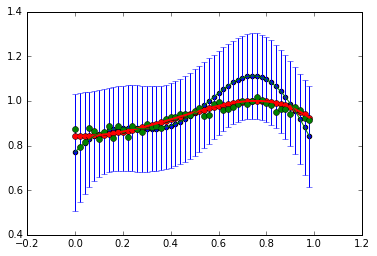

0.82


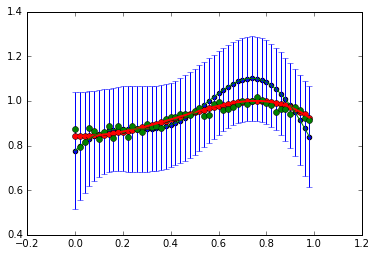

0.94


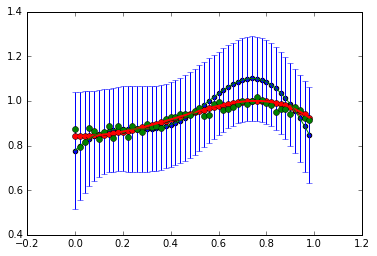

0.58


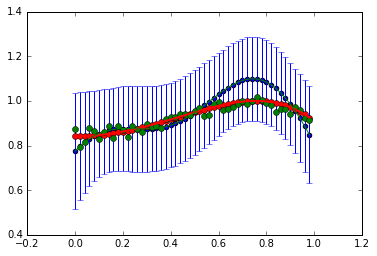

0.66


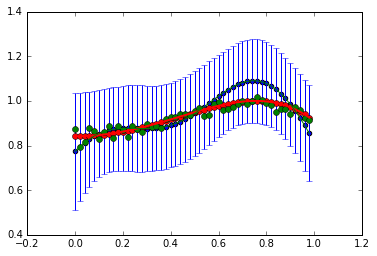

0.3


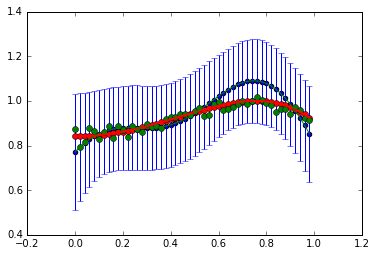

0.4


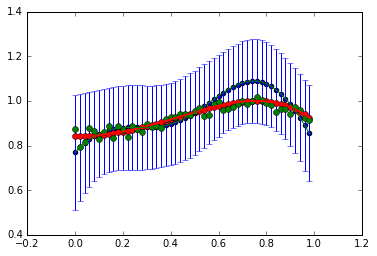

0.88


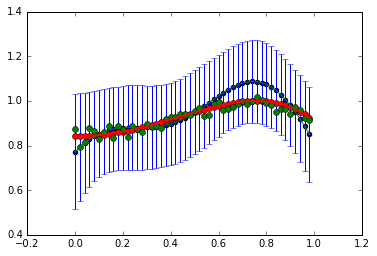

0.06


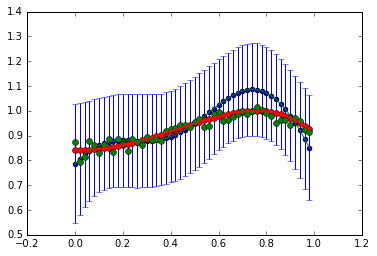

0.18


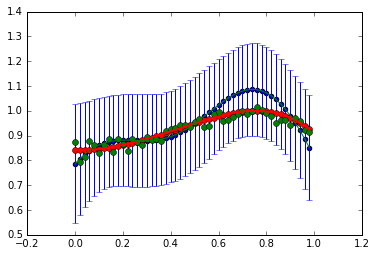

0.16


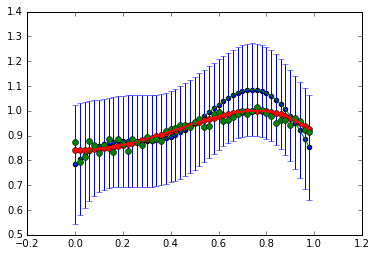

0.46


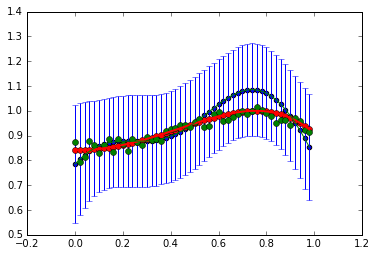

0.04


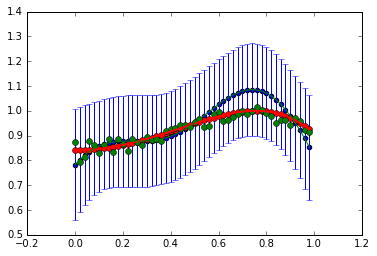

0.32


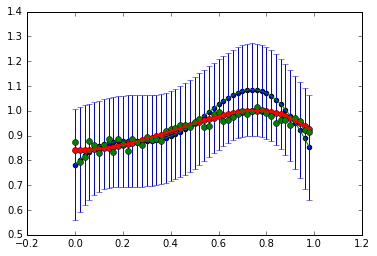

0.42


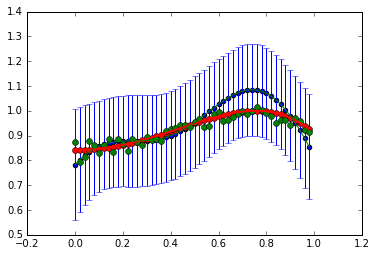

0.56


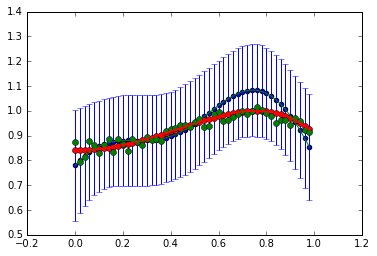

0.28


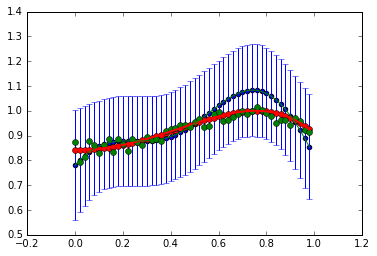

0.76


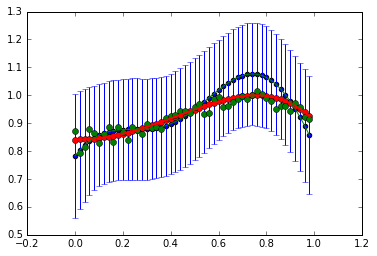

0.0


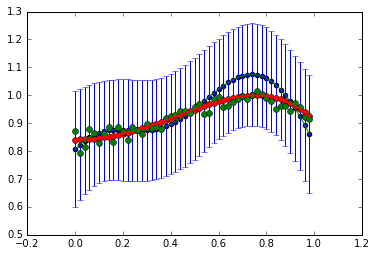

0.52


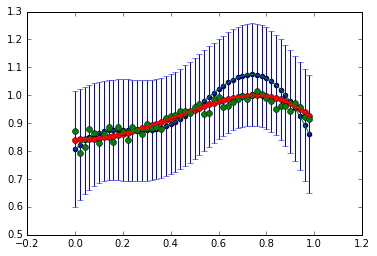

In [7]:
plot_graphs(plot_sequential_data, calculate_phi, 5, x, y, gauss_y, 1e-4,6.0)

## 5. Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

Beta represents how confident you are with your model.
A lower beta means that you are less confident with your model.
Since s star is directly affected by 1/beta, a lower beta will result in higher errors.
This explains the high error bars from when beta becomes too low. 

When beta is higher, you are more confident with your result. 
This explains the low error bars when beta becomes very high. 

However, beta also affects all your m* and s* so that is why a higher beta will also skew some of the points. 

Having to choose a beta which does curve fitting the best though, reeks of model selection.